# 건강검진 데이터로 가설검정하기
## 수치형 데이터를 시각화하여 2가지 가설을 검증합니다.
- [가설1] 음주 여부에 따라 건강검진 수치 차이가 있을까?
- [가설2] 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

## 목차
10. 산점도(산포도)와 회귀선 상관관계 보기 - scatterplot, lmplot
11. 수치형 데이터의 분포를 표현하기 - distplot
12. 상관계수 - heatmap 으로 표현하기

---

In [2]:
# loat library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 설정
# 운영체제 별 설정을 위해 로드한다.
import os

# 맥, 윈도우인 경우를 각각 if, else문에 넣고 설정하기
if os.name == 'posix' :  # 내 os 이름 넣기. os 이름 확인 방법은 아래 셀 참고
    plt.rc("font", family="AppleGothic")
else :
    plt.rc("font", family="Malgun Gothic")

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [6]:
# 레티나 설정으로 글씨를 선명하게 하기
# 폰트의 주변이 흐릿하게 보이는 것을 방지함.

%config InlineBackend.figure_format = 'retina'

In [8]:
# 데이터 읽어오기
df = pd.read_csv('data/NHIS_OPEN_GJ_2017.CSV', encoding='cp949')
df

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
0         1.0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN   
1         1.2    1.0  ...   10.0   1.0   0.0          1      NaN    NaN   
2         1.0    0.8  ...  136.0   1.0   0.0          1      NaN    NaN   
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
4         1.5    1.5  ...   68.0   3.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN           NaN  1.0  20181126  
1           NaN           NaN  1.0  20181126  
2           NaN           NaN  0.0  20181126  
3           NaN           NaN  NaN  20181126  
4           NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[1000000 rows x 34 columns]

In [10]:
# 데이터 샘플 추출하기 : random_state 설정하여
df_sample = df.sample(1000, random_state=1)
df_sample

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
890013  2017   890014     2           11    29      155.0        50.0   65.1   
875389  2017   875390     2            9    11      155.0        45.0   66.5   
358458  2017   358459     2           11    11      160.0        50.0   72.0   
808228  2017   808229     1            9    48      175.0        65.0   75.2   
317698  2017   317699     2           13    42      150.0        55.0   79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
890013    1.0    0.8  ...   22.0   2.0   1.0          1      NaN    NaN   
875389    0.9    0.8  ...   12.0   1.0   1.0          1      NaN    NaN   
358458    0.9    0.8  ...   11.0   1.0   0.0          0      NaN    NaN   
808228    1.2    1.2  ...  122.0   3.0   1.0          1      NaN    NaN   
317698    1.0    1.0  ...   22.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  0.0  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  0.0  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

## 10. 산점도(산포도)와 회귀선 상관관계 보기 - scatterplot, lmplot
### scatterplot
- 수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

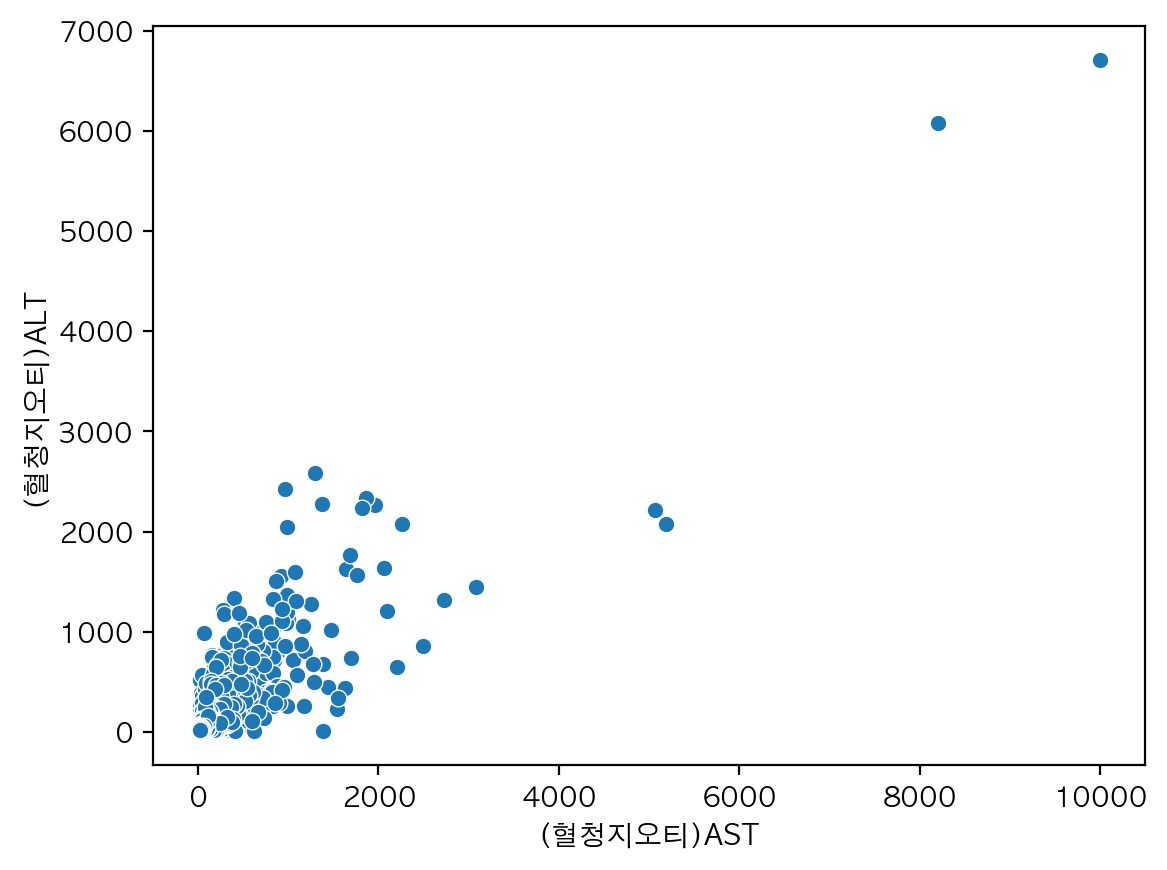

In [24]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 를 그리기
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

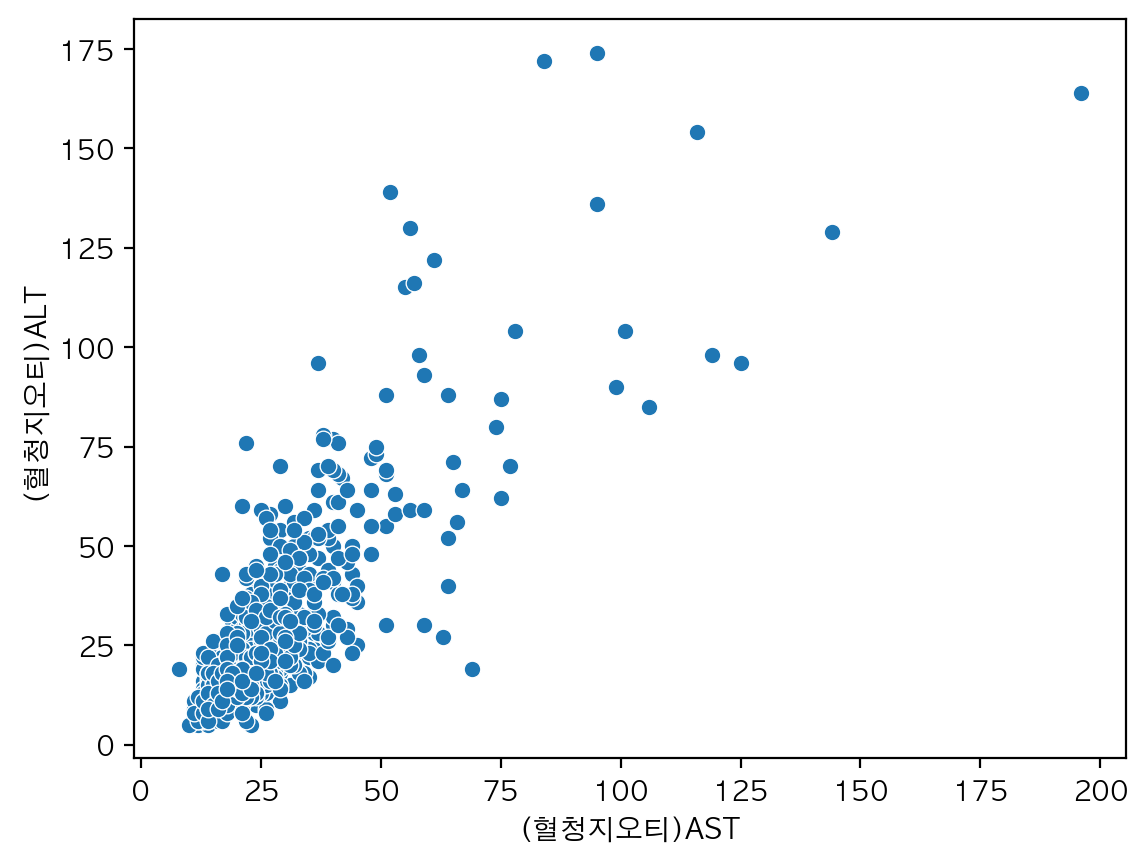

In [21]:
# sample data로 그려보기
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT")

-> 샘플 데이터로 그리면 이상치 파악하기가 좋다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

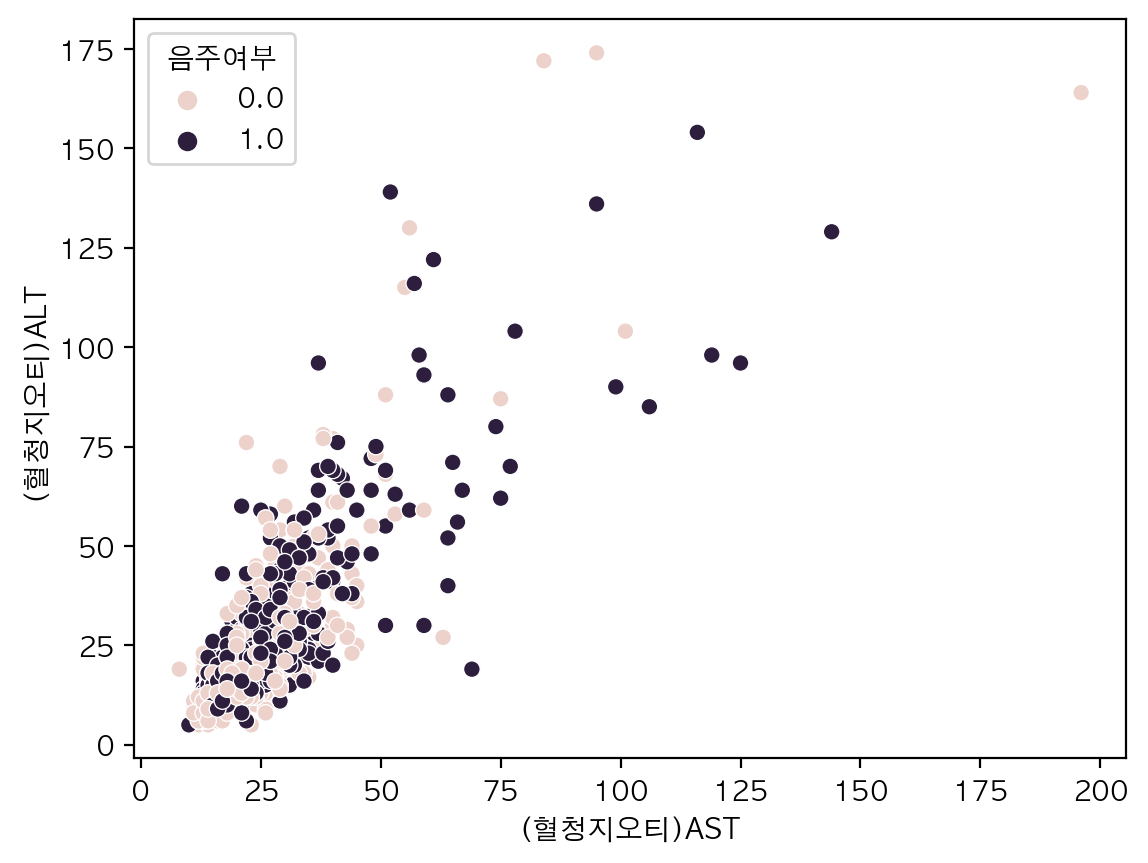

In [28]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 를 그리고, 음주여부에 따라 다른 색상으로 표현하기

sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

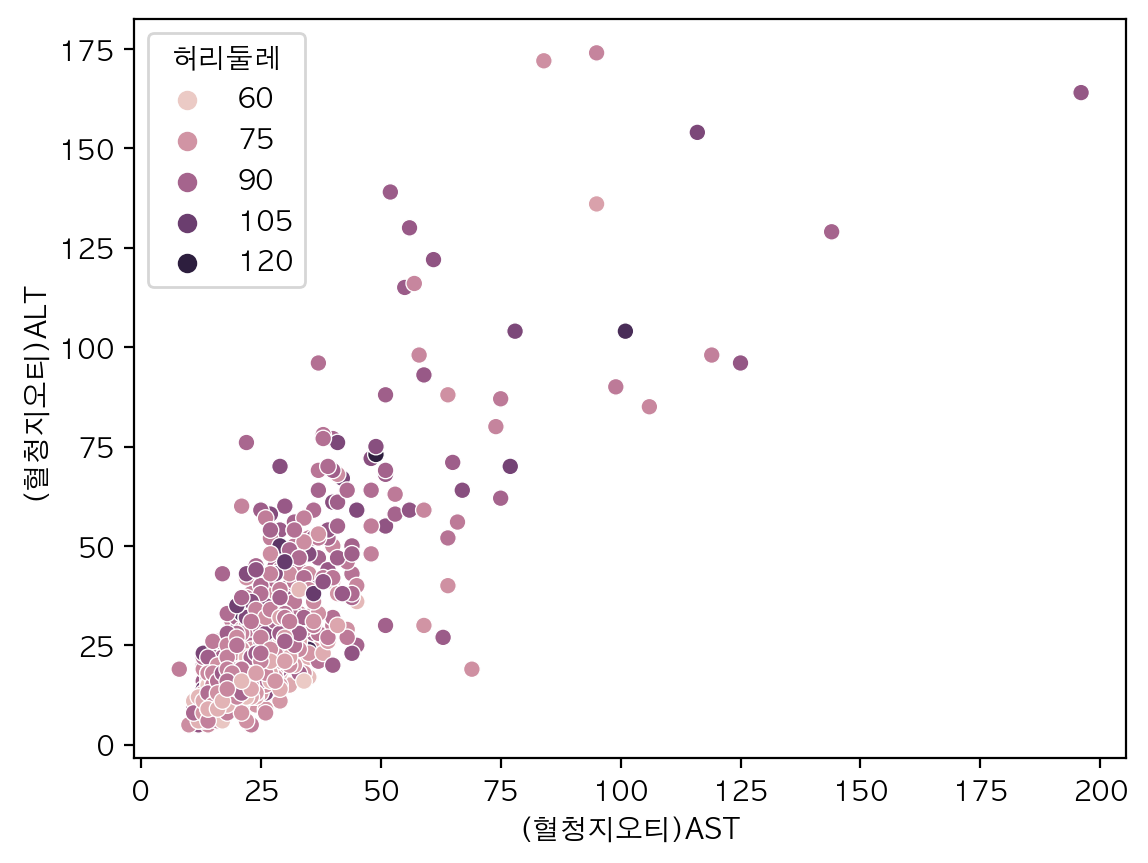

In [30]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 를 그리고, 허리둘레에 따라 다른 색상으로 표현하기

sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

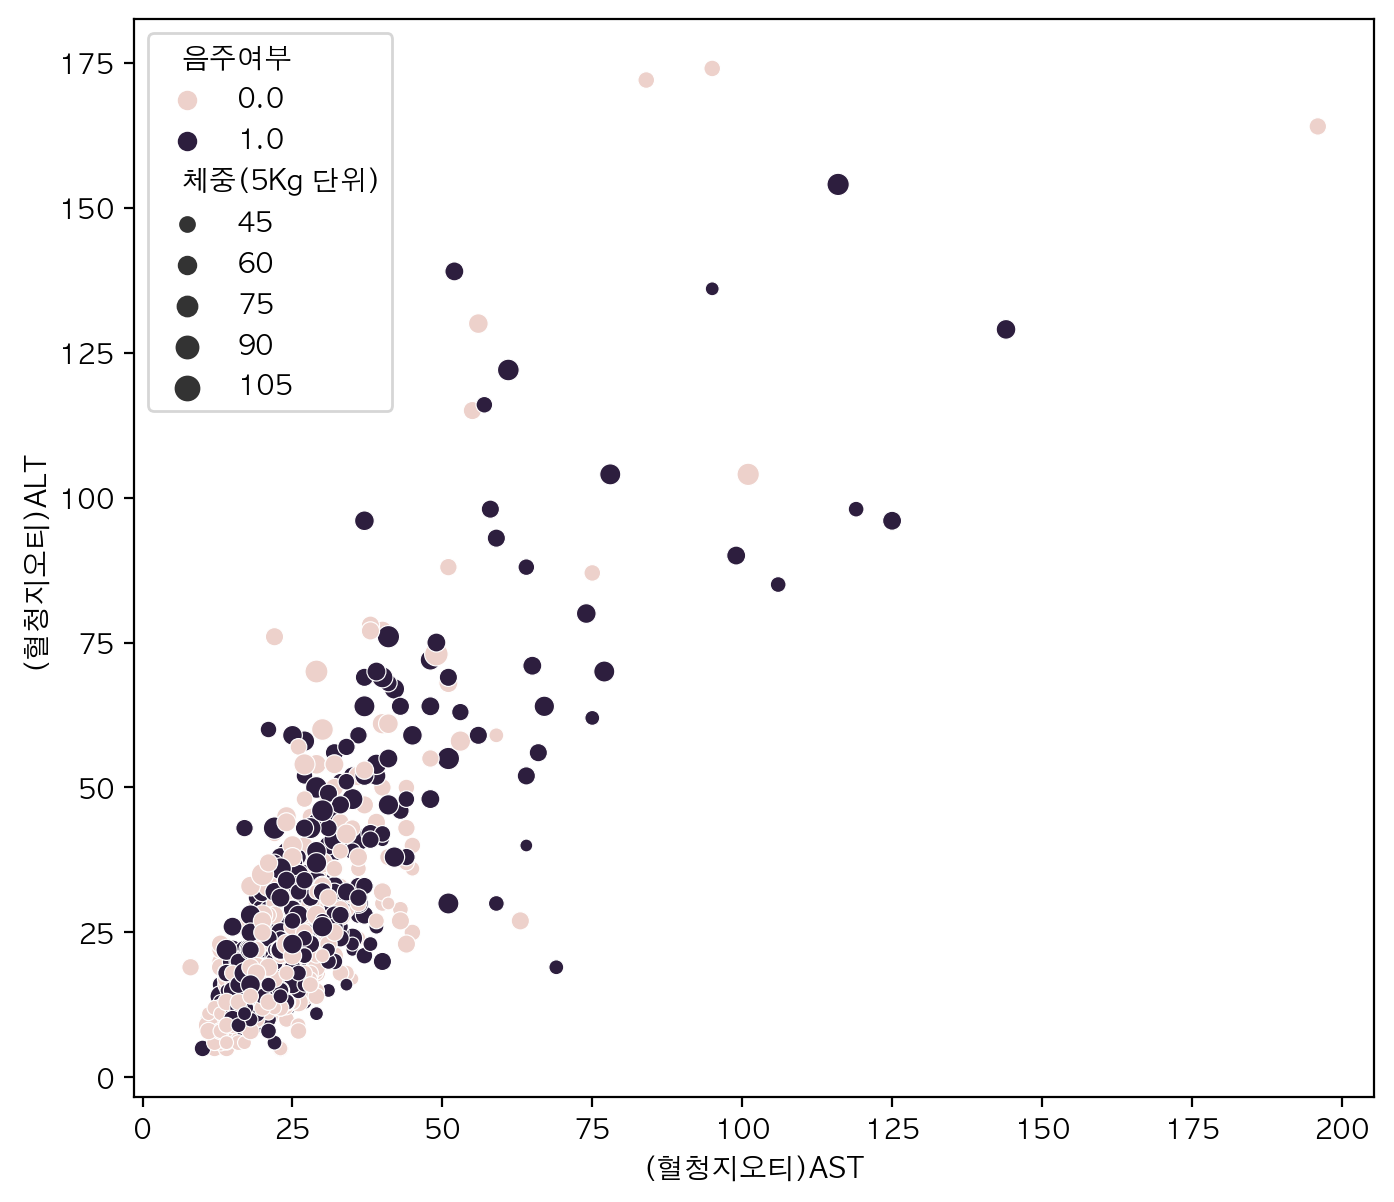

In [32]:
# size 옵션 사용하기 -> 원의 크기로 표현됨

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg 단위)")

-> 여러 개의 변수를 한 번에 보기 좋다.

### lmplot
- 장점 : 다변수를 서브플롯으로 나눠서 볼 수 있다. 즉 그래프 분석에 더 용이할 수 있다. (scatterplot은 하나의 그래프에 모두 표현되는 반면)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


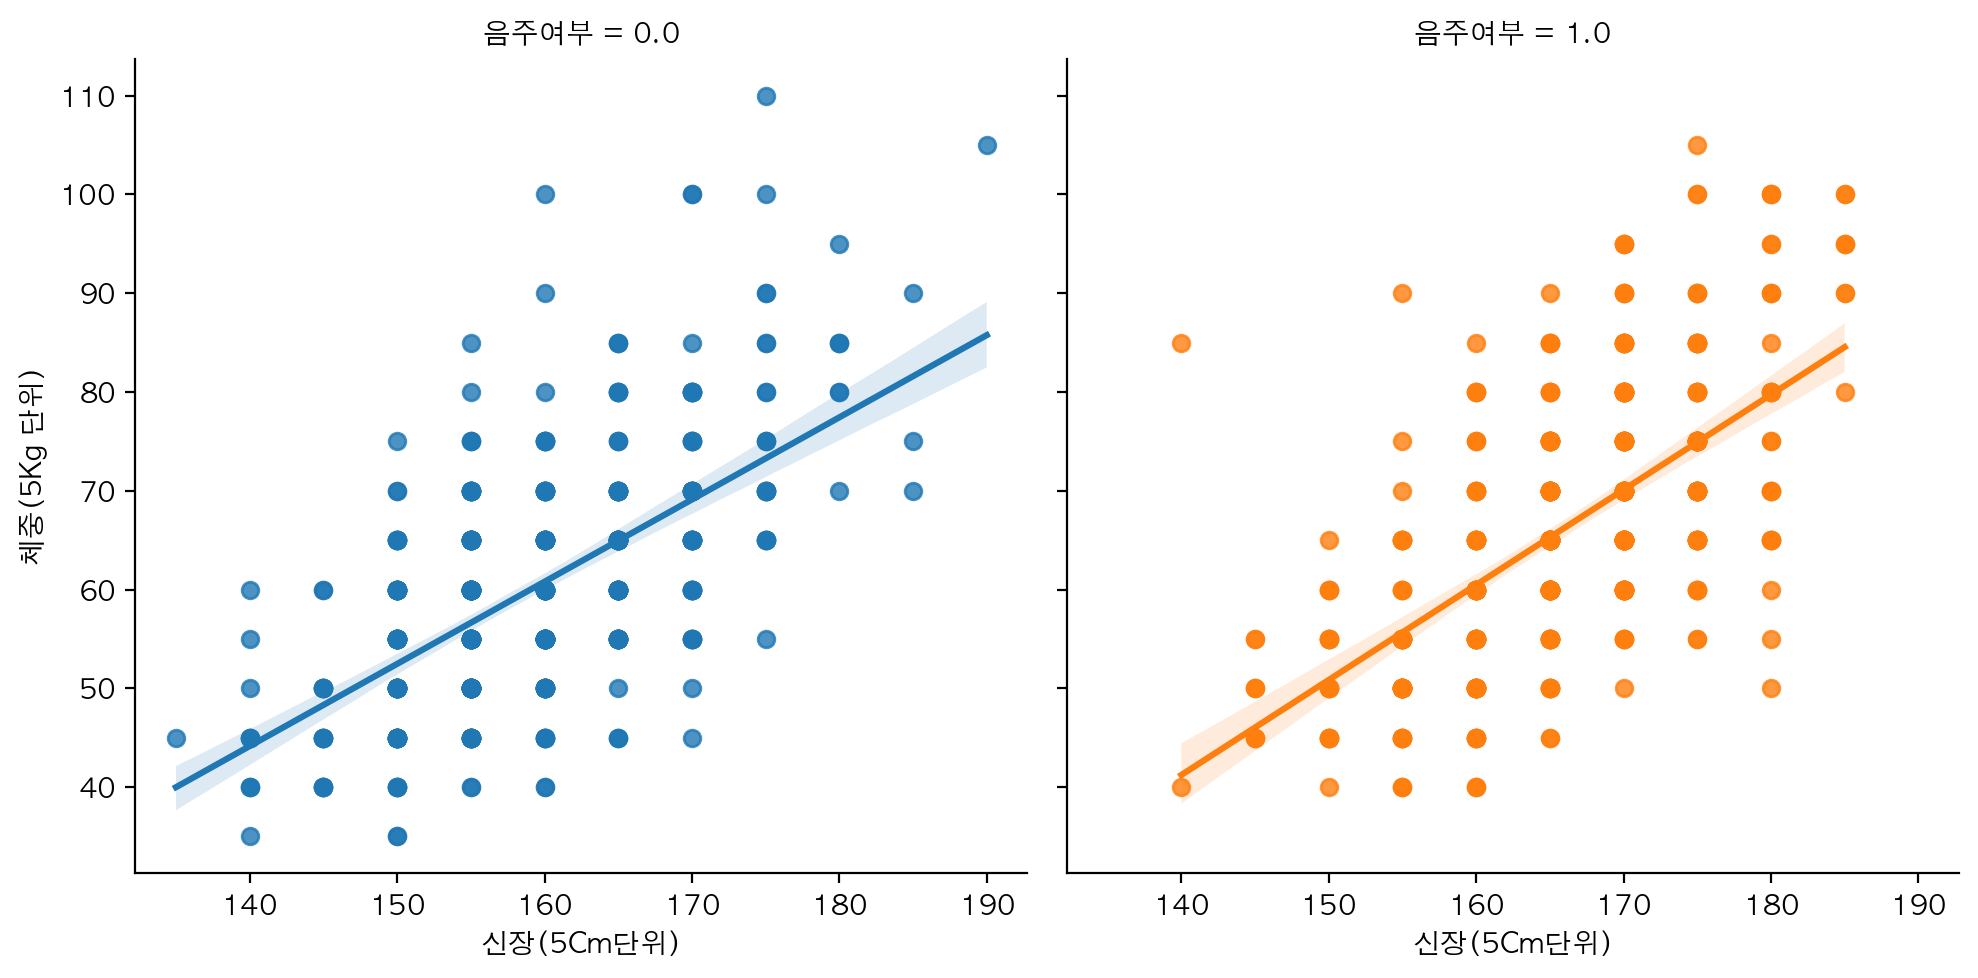

In [36]:
# lmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리고, 음주여부에 따라 다른 색상으로 표현하기

sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="음주여부")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


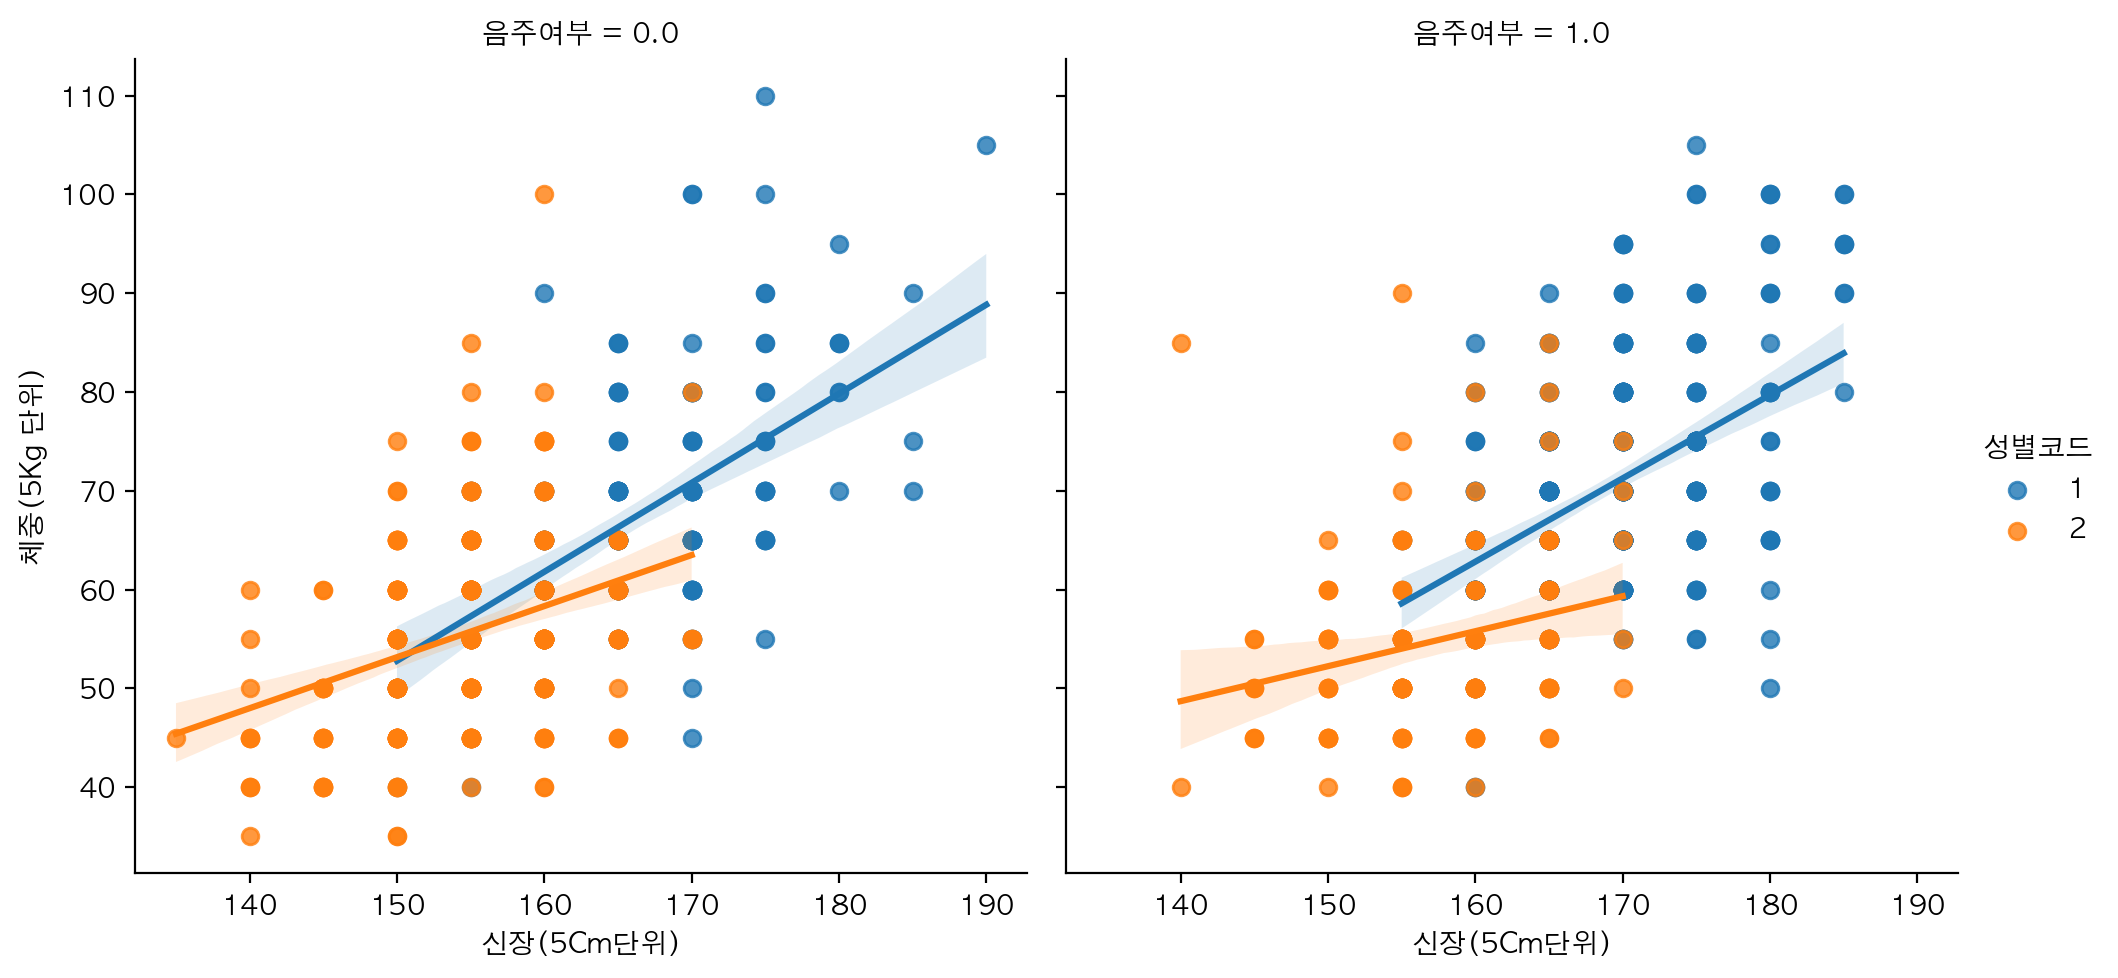

In [38]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

회귀선으로 볼 때   
- 신장과 체중은 양의 상관관계를 이룬다.
- 남자일 때 회귀선이 더 가파르다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


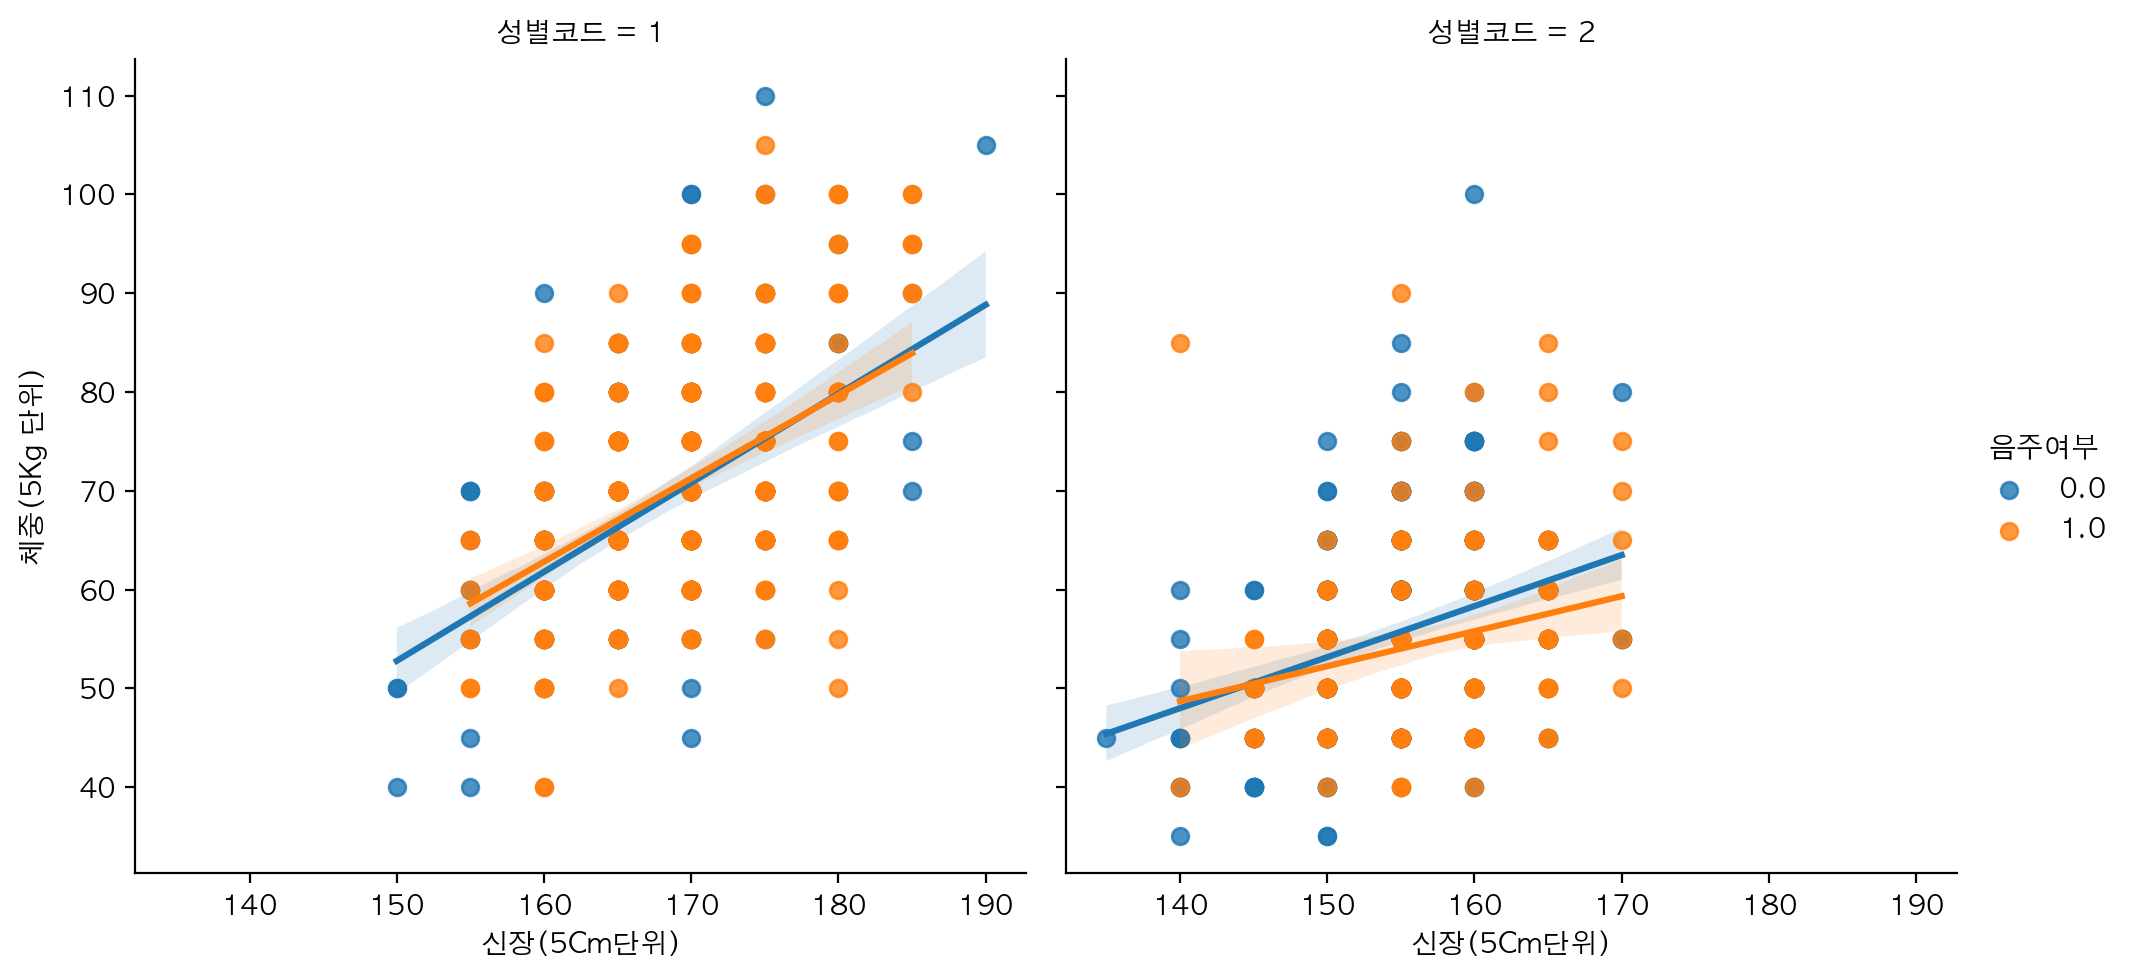

In [42]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

- 남성일 때 음주여부 회귀선이 겹쳐진 것으로 보아 파랑점과 주황점이 많이 겹쳐져있음을 알 수 있다.
- 여성일 때 음주하지 않는 사람들(0)의 신장과 체중의 상관관계가 더 크다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


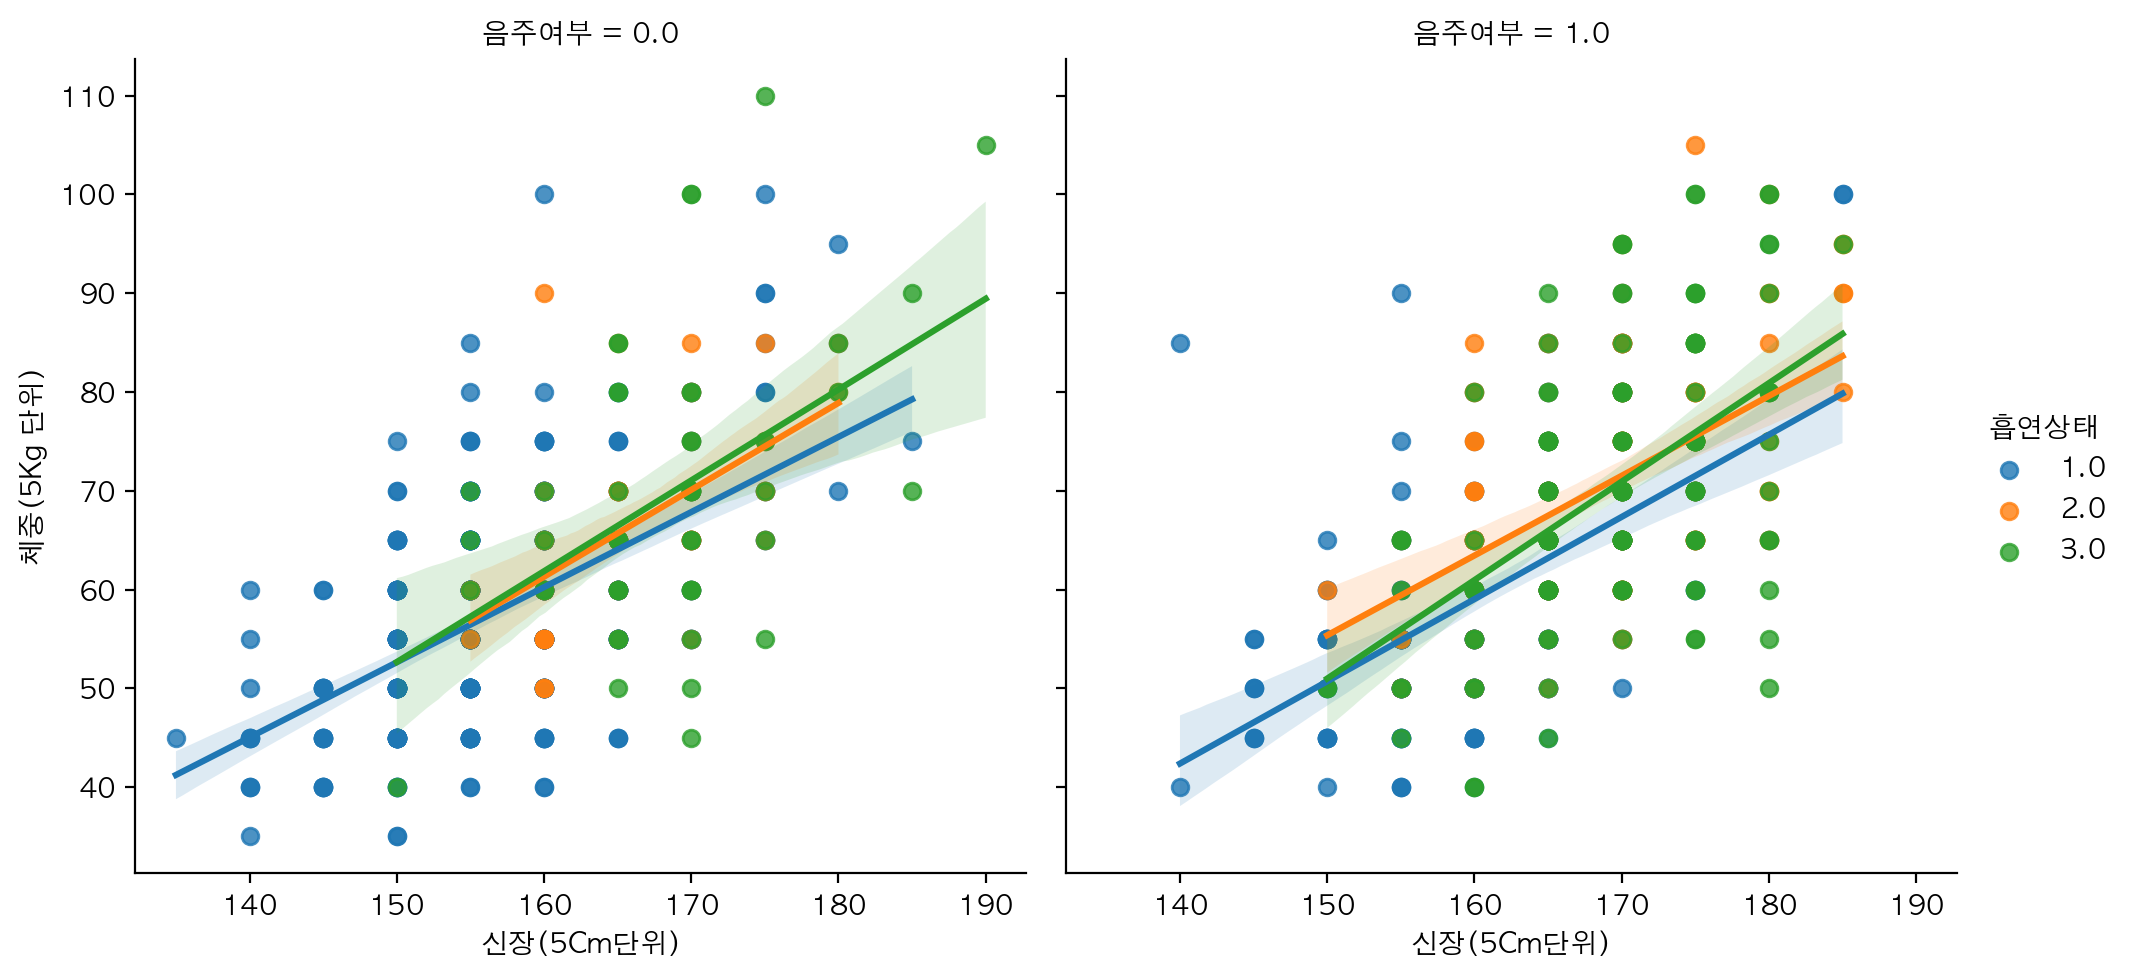

In [48]:
# lmplot의 col기능으로 음주여부에 따라 서브플롯 그리기

sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="흡연상태", col="음주여부")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


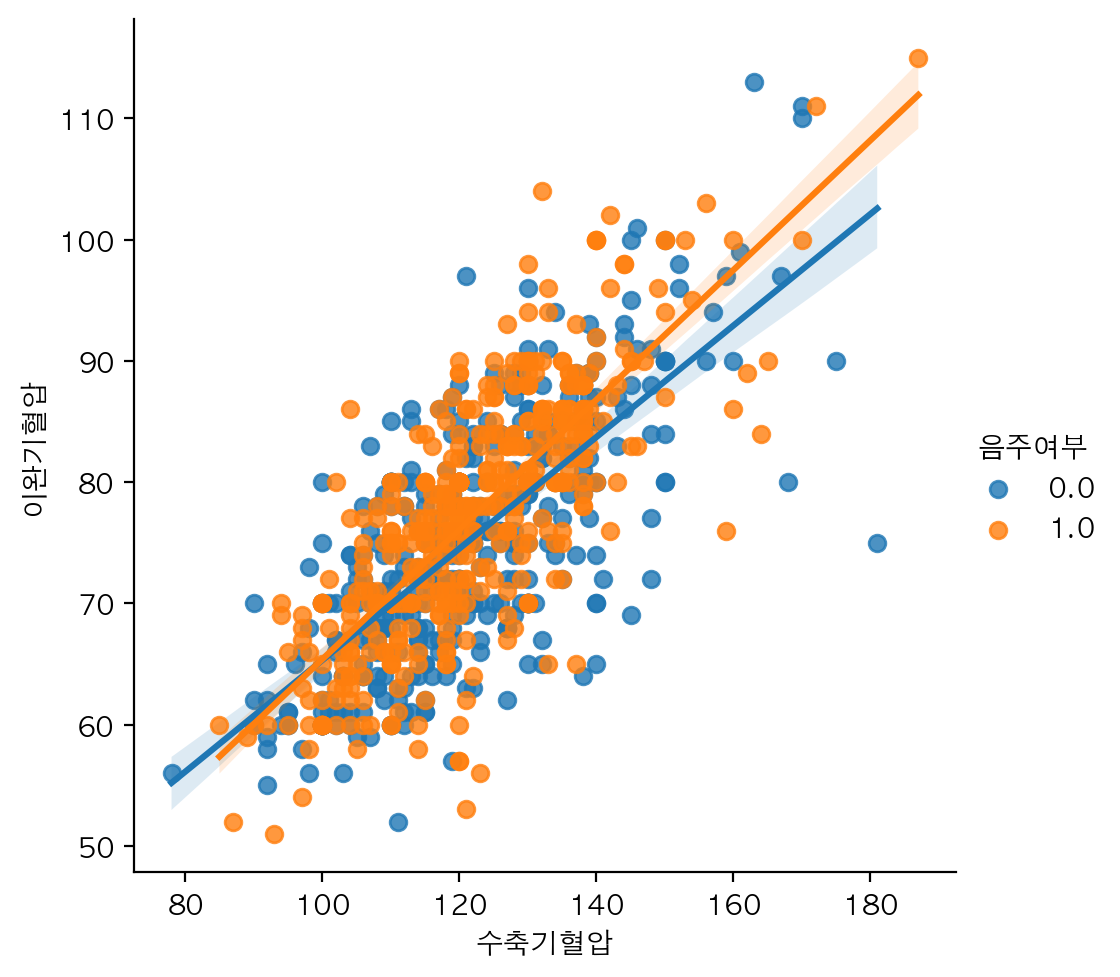

In [50]:
# lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 하기
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

- 수축기혈압과 이완기혈압은 강한 양의 상관관계를 보여준다.
- 음주하는 사람들의 회귀선이 더 가파르다.

**< AST와 ALT >**  

AST와 ALT는 간세포에 들어있는 효소이다.  

간이 손상되어 간세포가 파괴되면 그 안에 있던 AST와 ALT가 빠져나와 혈액 속에 섞여 돌아다니게 된다. 따라서 간이 손상되면 AST와 ALT 수치가 높아진다.  
정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5-40 IU/L 정도이다.  

간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드물다.  
하지만 AST와 ALT 같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이 된다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


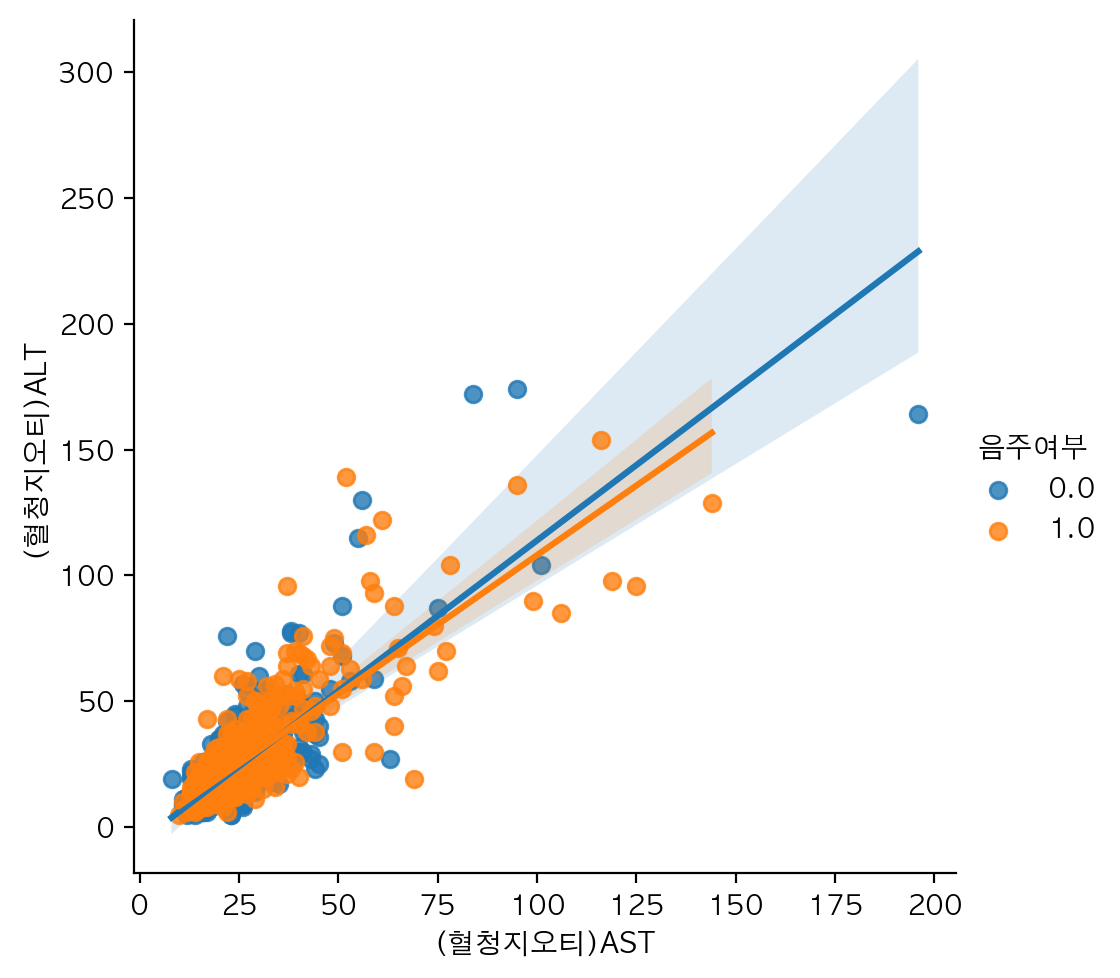

In [56]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 를 그리고 음주여부에 따라 다른 색상으로 표현하기

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

- 음주하는 사람들의 이상치가 더 많다. (위쪽의 흩어져있는 주황점들)
- 이상치를 제외하고 그래프를 그리는 옵션은 robust이다. robust=True로 설정하면 된다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


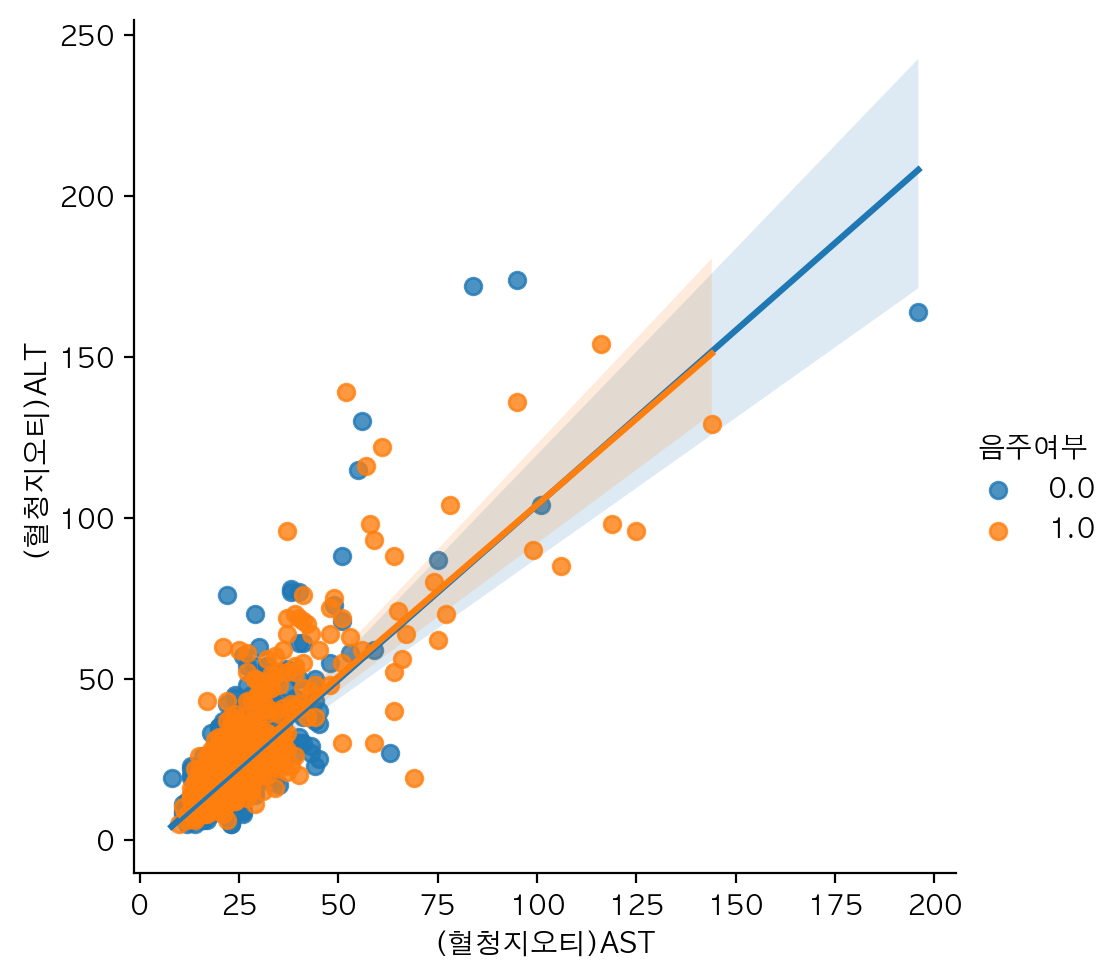

In [59]:
# 이상치 제외하고 그리기

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

robust=True로 그래프를 그리니 회귀선이 거의 일치하게 되었다.

### 이상치 다루기
- 이상치가 있으면 데이터가 자세히 보이지 않거나, 이상치로 인해 회귀선이 달라지기도 한다.
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 한다.

In [67]:
# "(혈청지오티)AST", "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출하여 df_ASLT 라는 변수에 담기
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400 ) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
890013  2017   890014     2           11    29      155.0        50.0   65.1   
875389  2017   875390     2            9    11      155.0        45.0   66.5   
358458  2017   358459     2           11    11      160.0        50.0   72.0   
808228  2017   808229     1            9    48      175.0        65.0   75.2   
317698  2017   317699     2           13    42      150.0        55.0   79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
890013    1.0    0.8  ...   22.0   2.0   1.0          1      NaN    NaN   
875389    0.9    0.8  ...   12.0   1.0   1.0          1      NaN    NaN   
358458    0.9    0.8  ...   11.0   1.0   0.0          0      NaN    NaN   
808228    1.2    1.2  ...  122.0   3.0   1.0          1      NaN    NaN   
317698    1.0    1.0  ...   22.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  0.0  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  0.0  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


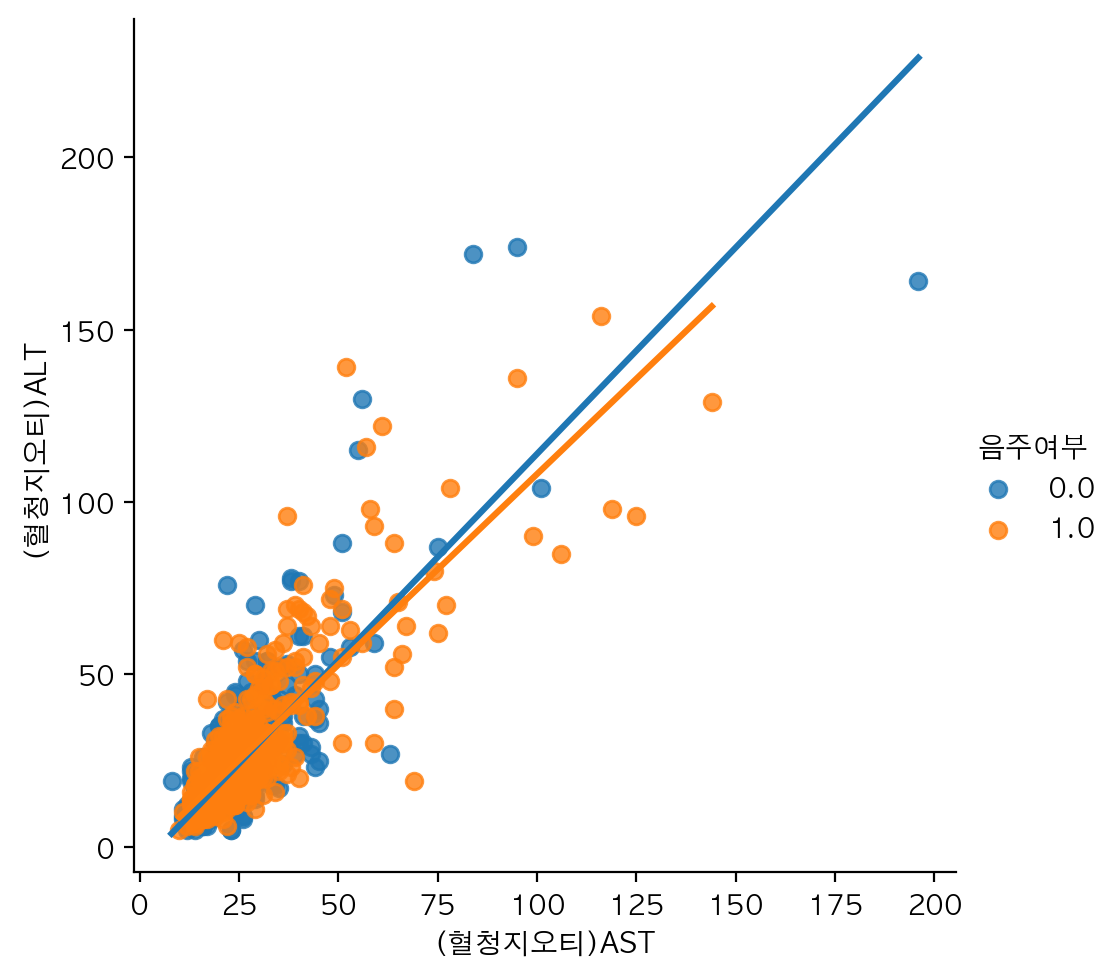

In [71]:
# 이상치를 제거한 "(혈청지오티)AST", "(혈청지오티)ALT"를 lmplot으로 그리고, 음주여부에 따라 다른 색으로 표현하기

sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

-> 이상치에 영향을 덜 받는 그래프를 그렸다.

In [76]:
# "(혈청지오티)AST", "(혈청지오티)ALT"가 400 이상인 값만 데이터프레임 형태로 추출하여 df_ASLT_high 라는 변수에 담기

df_ASLT_high = df_sample[(df_sample["(혈청지오티)AST"] > 400 ) | (df_sample["(혈청지오티)ALT"] > 400)]
df_ASLT_high

Empty DataFrame
Columns: [기준년도, 가입자일련번호, 성별코드, 연령대코드(5세단위), 시도코드, 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부, 구강검진 수검여부, 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상, 치석, 데이터공개일자]
Index: []

[0 rows x 34 columns]

-> 샘플 데이터에는 400 이상인 값이 없다.  
전체 데이터에서 있는지 확인해본다.

In [79]:
# "(혈청지오티)AST", "(혈청지오티)ALT" 가 400 이상인 값만 확인하기

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400 ) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
2771    2017     2772     1            8    44      170.0        65.0   82.2   
5047    2017     5048     1            7    31      170.0        60.0   77.0   
10803   2017    10804     1           10    46      170.0        75.0   83.1   
14948   2017    14949     1            5    47      180.0       130.0  110.0   
16433   2017    16434     2           12    44      160.0        65.0   86.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
990160  2017   990161     1           13    11      170.0        70.0   85.0   
990909  2017   990910     1            9    48      165.0        80.0   95.0   
991596  2017   991597     2           16    48      150.0        40.0   67.0   
996864  2017   996865     2            7    44      155.0        45.0   69.0   
997022  2017   997023     1           12    41      180.0        90.0   96.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771      1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047      1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   
10803     0.7    1.0  ...  228.0   3.0   1.0          1      NaN    NaN   
14948     1.2    1.5  ...  115.0   1.0   0.0          0      NaN    NaN   
16433     1.0    1.0  ...  672.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
990160    0.8    0.8  ...  626.0   2.0   0.0          0      NaN    NaN   
990909    1.5    1.5  ...   34.0   3.0   0.0          0      NaN    NaN   
991596    0.7    0.6  ...   39.0   1.0   0.0          0      NaN    NaN   
996864    1.2    1.5  ...  490.0   1.0   0.0          0      NaN    NaN   
997022    1.2    1.0  ...  500.0   3.0   1.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771        NaN           NaN  NaN  20181126  
5047        NaN           NaN  0.0  20181126  
10803       NaN           NaN  0.0  20181126  
14948       NaN           NaN  NaN  20181126  
16433       NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
990160      NaN           NaN  NaN  20181126  
990909      NaN           NaN  NaN  20181126  
991596      NaN           NaN  NaN  20181126  
996864      NaN           NaN  NaN  20181126  
997022      NaN           NaN  1.0  20181126  

[394 rows x 34 columns]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


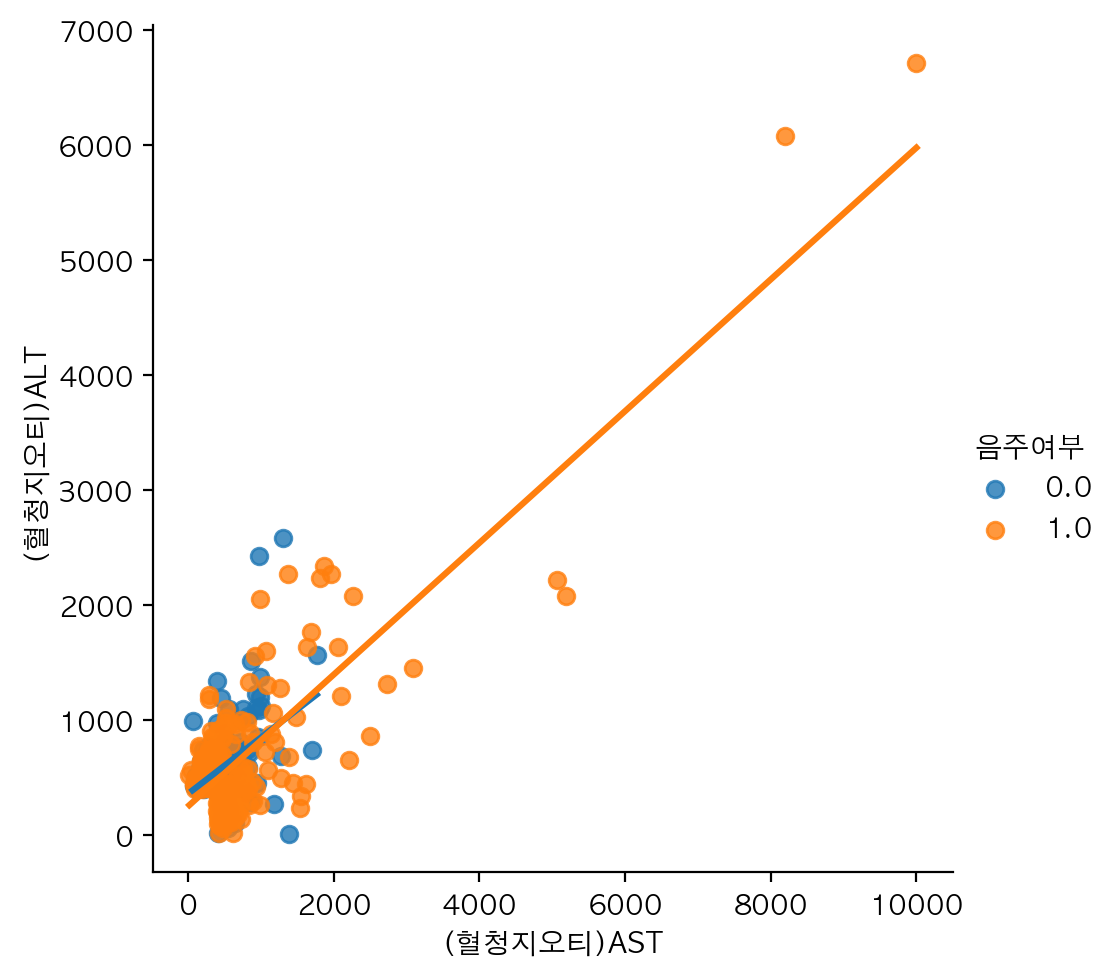

In [81]:
# 이상치만 시각화하기

sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

-> 이상치도 꽤 많고, AST가 10000 이상의 값도 보인다.

In [87]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000] 
df_ASLT_high_8000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
677177  2017   677178     1           17    41      155.0        55.0  81.0   
887237  2017   887238     1            5    41      160.0        55.0  71.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
677177    0.2    0.9  ...  888.0   1.0   1.0          0      NaN    NaN   
887237    1.2    1.0  ...  379.0   3.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
677177      NaN           NaN NaN  20181126  
887237      NaN           NaN NaN  20181126  

[2 rows x 34 columns]

In [89]:
# 특정 컬럼만 가져와서 확인하기
df_ASLT_high_8000.iloc[:, 4:27]

시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  수축기혈압  \
677177    41      155.0        55.0  81.0    0.2    0.9    2.0    2.0  100.0   
887237    41      160.0        55.0  71.0    1.2    1.0    1.0    1.0   97.0   

        이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
677177   60.0  ...      30.0      69.0  13.0  1.0      1.2      8200.0   
887237   71.0  ...     100.0      35.0  17.8  3.0      0.8      9999.0   

        (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
677177      6080.0  888.0   1.0   1.0  
887237      6710.0  379.0   3.0   1.0  

[2 rows x 23 columns]

-> 일부 컬럼만 자세히 보며 이상치에 대해 상관관계가 있는지 확인한다.

---
## 11. 수치형 데이터의 분포를 표현하기 - distplot
### [가설1] 검증하기 : 음주 여부에 따라 건강검진 수치 차이가 있을까?
- distplot은 히스토그램을 그려준다. 
- 히스토그램은 도수분포표에 따라 그림을 그리는 것을 말한다. 계급에 따라 데이터의 개수를 세주는 것이다.

In [13]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력하기

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [25]:
# 결측치가 없는 '총콜레스테롤'값만 변수에 넣기 (시리즈 형태로)
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol

0         178.0
1         255.0
2         211.0
3         160.0
4         253.0
          ...  
999995    196.0
999996    199.0
999997    240.0
999998    267.0
999999    172.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/2366470458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

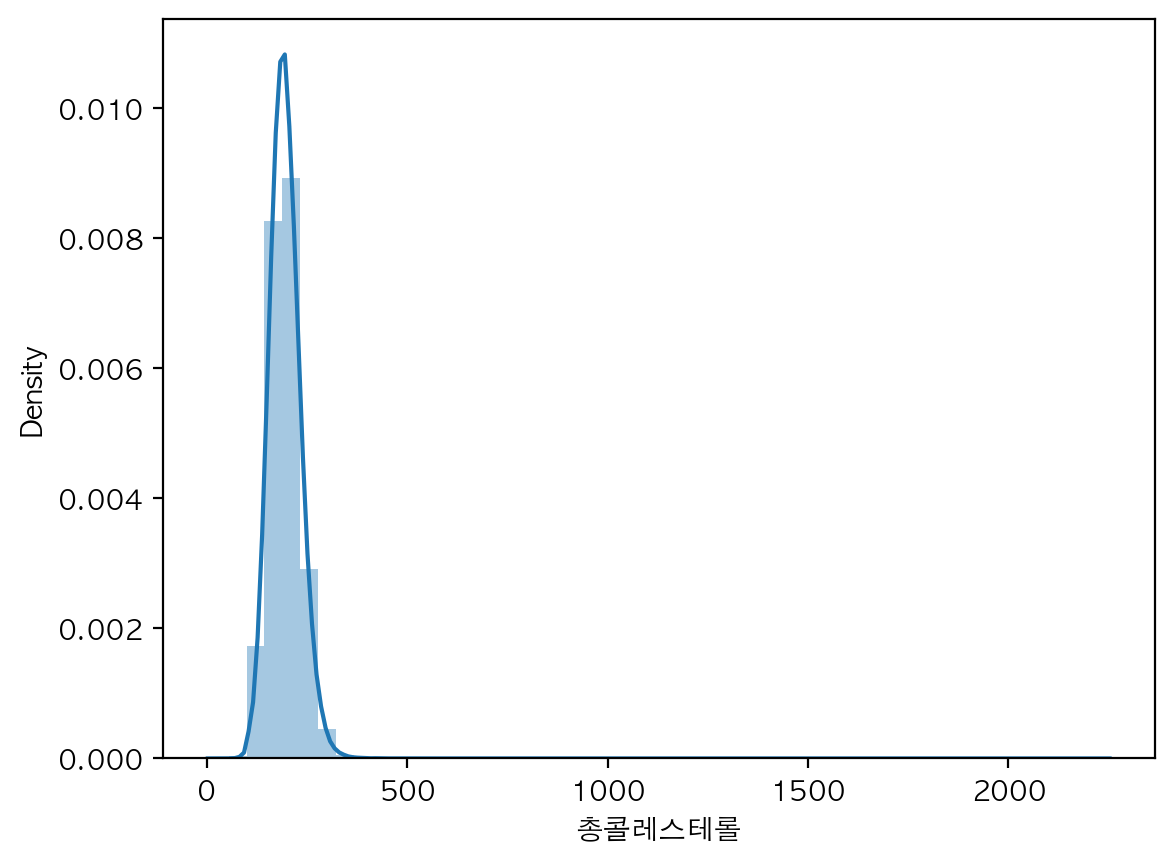

In [27]:
# '총콜레스테롤'에 따른 distplot 그리기

sns.distplot(df_chol)

- bins는 데이터를 몇 개로 나누어 담을 것인가?를 의미한다.
- 이상치 때문에 그래프가 한 쪽으로 몰려있는 것을 볼 수 있다. max값이 지나치게 크다.

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/2064853824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol, bins=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.optio

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

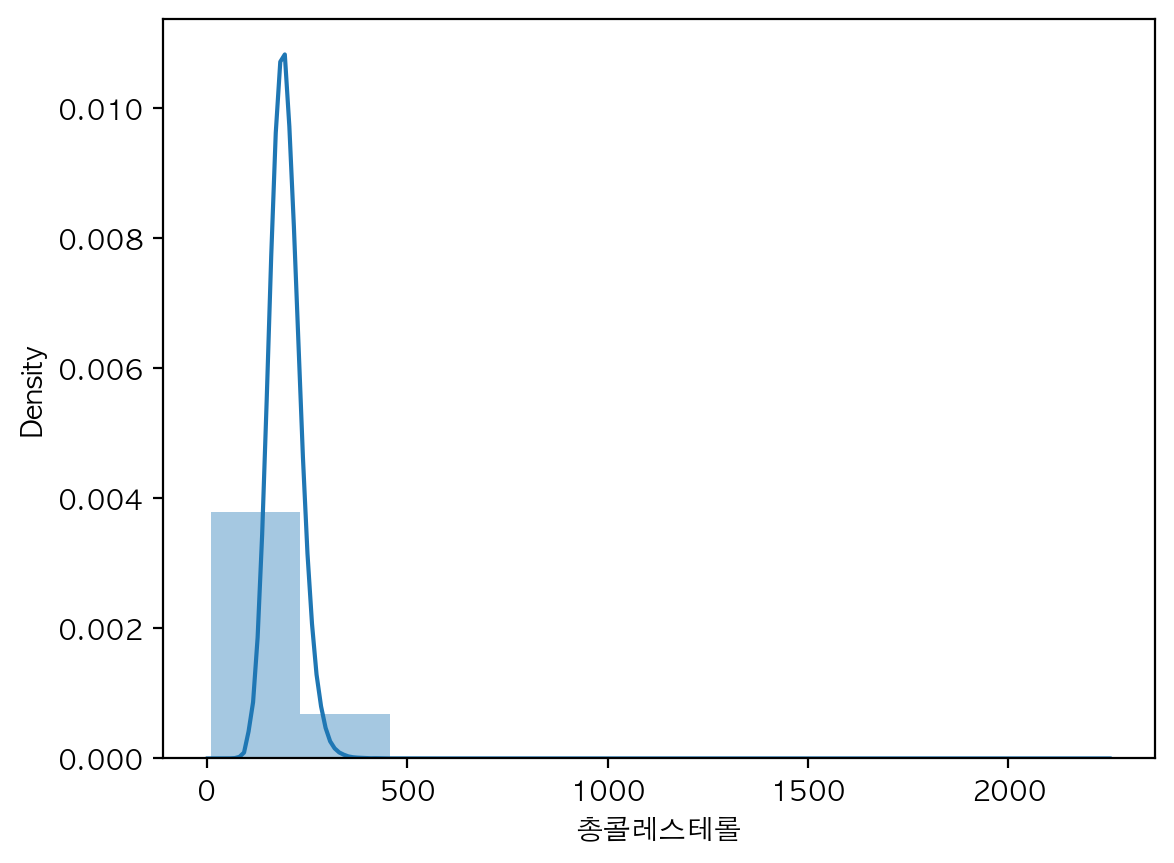

In [29]:
# distplot 옵션 활용하기 - bins

sns.distplot(df_chol, bins=10)

In [34]:
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

### 총콜레스테롤 값 시각화하기 - 음주여부에 따라

In [104]:
# 음주하는 사람들의 총 콜레스테롤 데이터 가져오기
df[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1)]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
3       2017        4     2           12    11      155.0        55.0   67.5   
5       2017        6     1            8    11      170.0        70.0   84.8   
6       2017        7     1            8    48      175.0       110.0  111.5   
9       2017       10     1            8    11      170.0        70.0   86.0   
18      2017       19     1            8    30      175.0        80.0   88.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
999992  2017   999993     2            5    30      160.0        50.0   68.1   
999993  2017   999994     1            8    47      175.0        95.0   88.0   
999994  2017   999995     1           10    41      165.0        85.0   98.0   
999995  2017   999996     2            9    41      165.0        55.0   70.0   
999998  2017   999999     1           11    47      160.0        70.0   99.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
5         1.2    1.0  ...   33.0   2.0   1.0          1      NaN    NaN   
6         1.0    1.0  ...   45.0   3.0   1.0          0      NaN    NaN   
9         1.0    1.0  ...   88.0   1.0   1.0          1      NaN    NaN   
18        0.8    0.8  ...   18.0   2.0   1.0          1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999992    1.0    1.0  ...   15.0   3.0   1.0          1      NaN    NaN   
999993    1.2    1.5  ...   93.0   3.0   1.0          0      NaN    NaN   
999994    0.7    0.9  ...   66.0   3.0   1.0          0      NaN    NaN   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
3           NaN           NaN  NaN  20181126  
5           NaN           NaN  1.0  20181126  
6           NaN           NaN  NaN  20181126  
9           NaN           NaN  0.0  20181126  
18          NaN           NaN  0.0  20181126  
...         ...           ...  ...       ...  
999992      NaN           NaN  1.0  20181126  
999993      NaN           NaN  NaN  20181126  
999994      NaN           NaN  NaN  20181126  
999995      NaN           NaN  NaN  20181126  
999998      NaN           NaN  NaN  20181126  

[496733 rows x 34 columns]

- distplot은 series 데이터를 넣어줘야 하므로 loc를 사용하여 "총콜레스테롤 값"만 가져온다.

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/916414499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

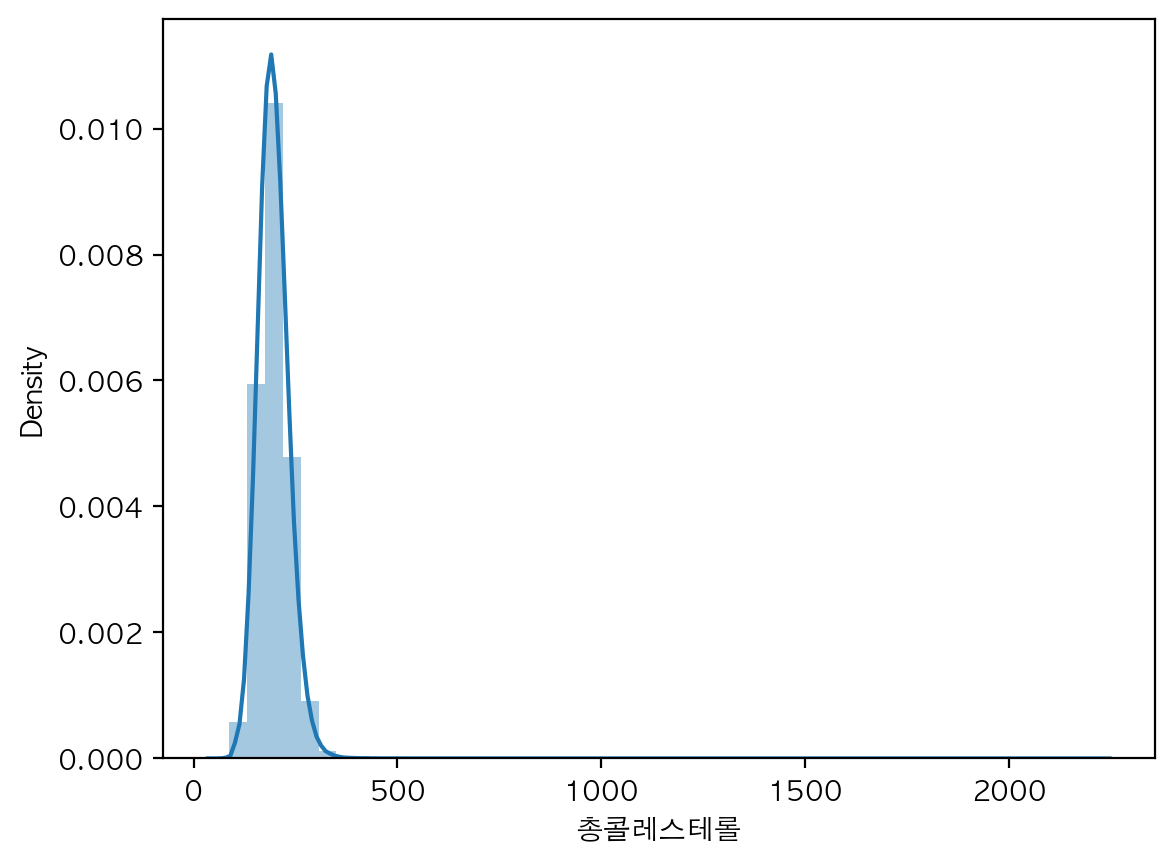

In [36]:
# 음주여부가 1인 값에 대한 "총콜레스테롤" 을 distplot 으로 그리기
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"])

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/2837888603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

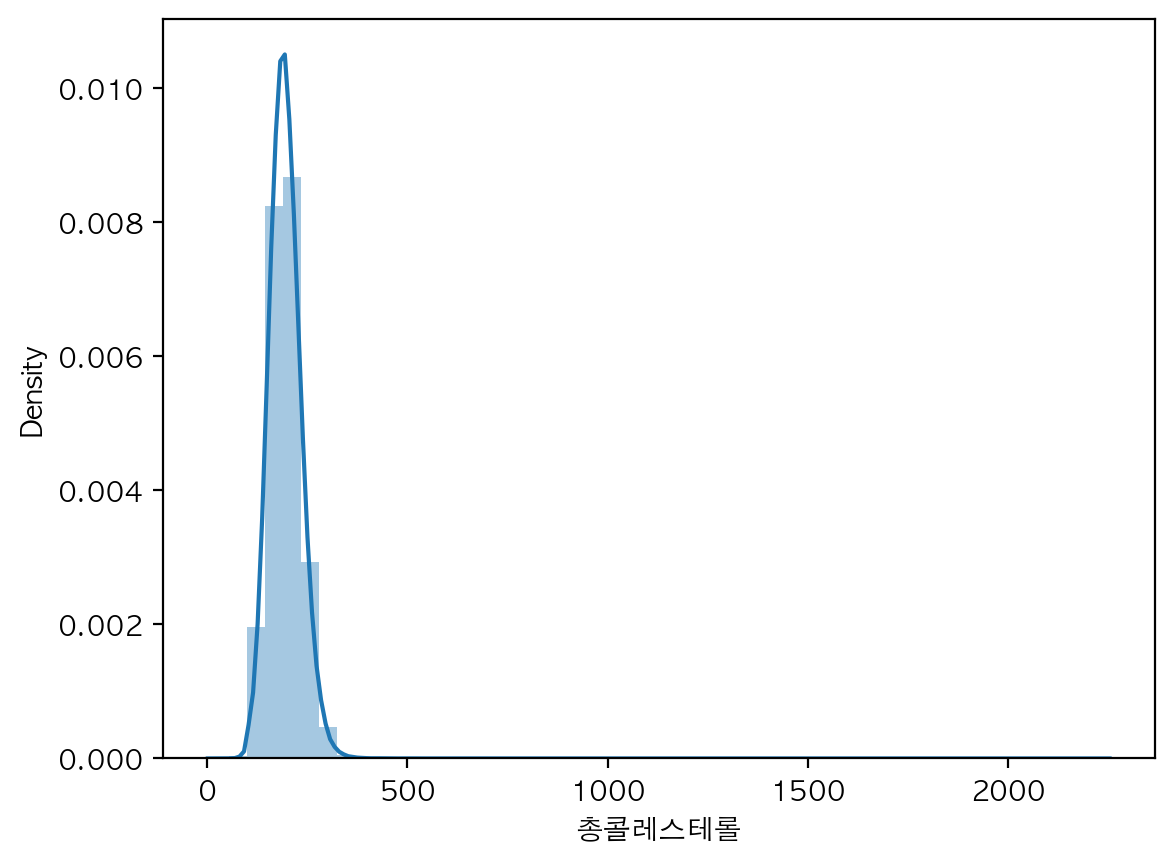

In [38]:
# 음주여부가 0인 값에 대한 "총콜레스테롤" 을 distplot 으로 그리기
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"])

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/954383877.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

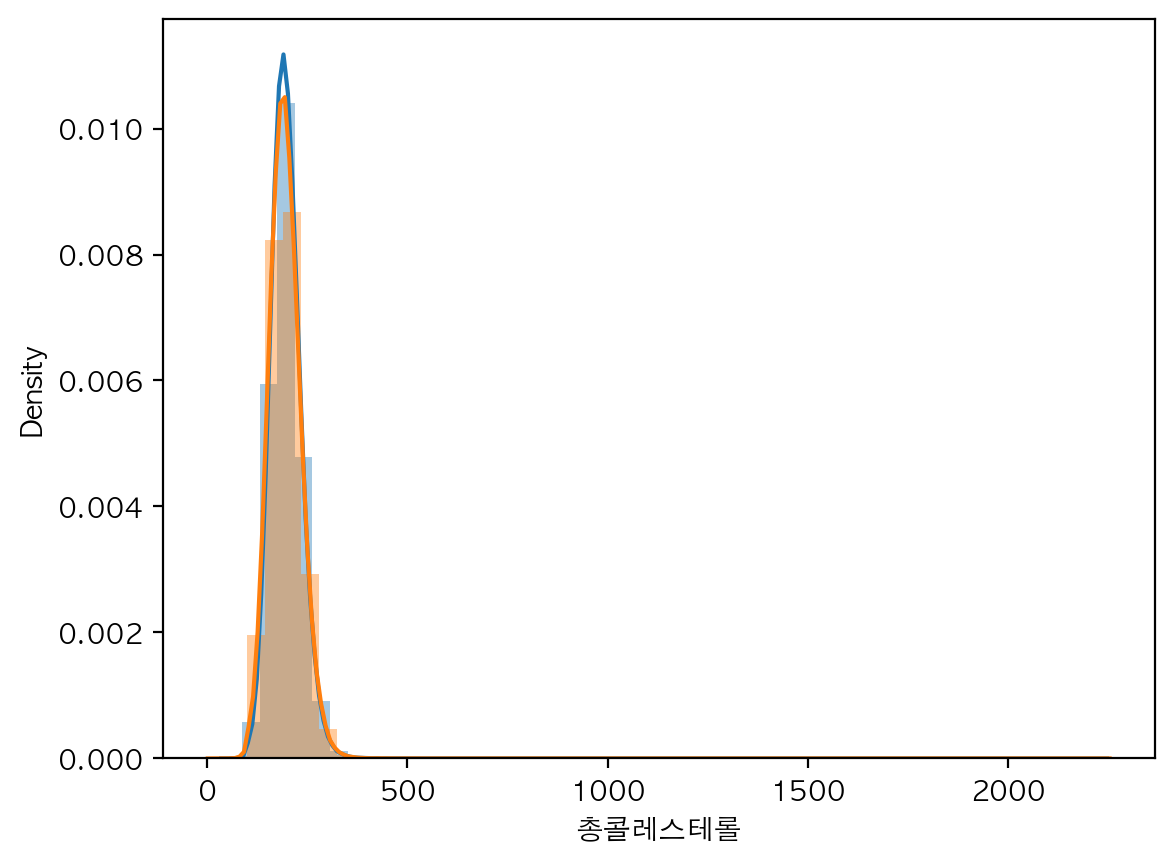

In [40]:
# 음주여부 값에 대한 "총콜레스테롤"을 distplot으로 그리며, 하나의 그래프에 표시되도록 하기

sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"])

sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"])

#### kde란?
- kde는 Kernal Density Estimation을 의미한다.
- 샘플 안에 없는 데이터를 추정하여 존재할 구간안에 그 값이 존재할 확률을 나타낸다.
- 확률밀도함수라고 생각하면 된다.
    - 확률밀도함수란 히스토그램을 부드러운 곡선으로 처리해주는 것이다.

/var/folders/rq/85s8zsjd42lfc1rs77545z540000gn/T/ipykernel_1884/2327583809.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], hist=False)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

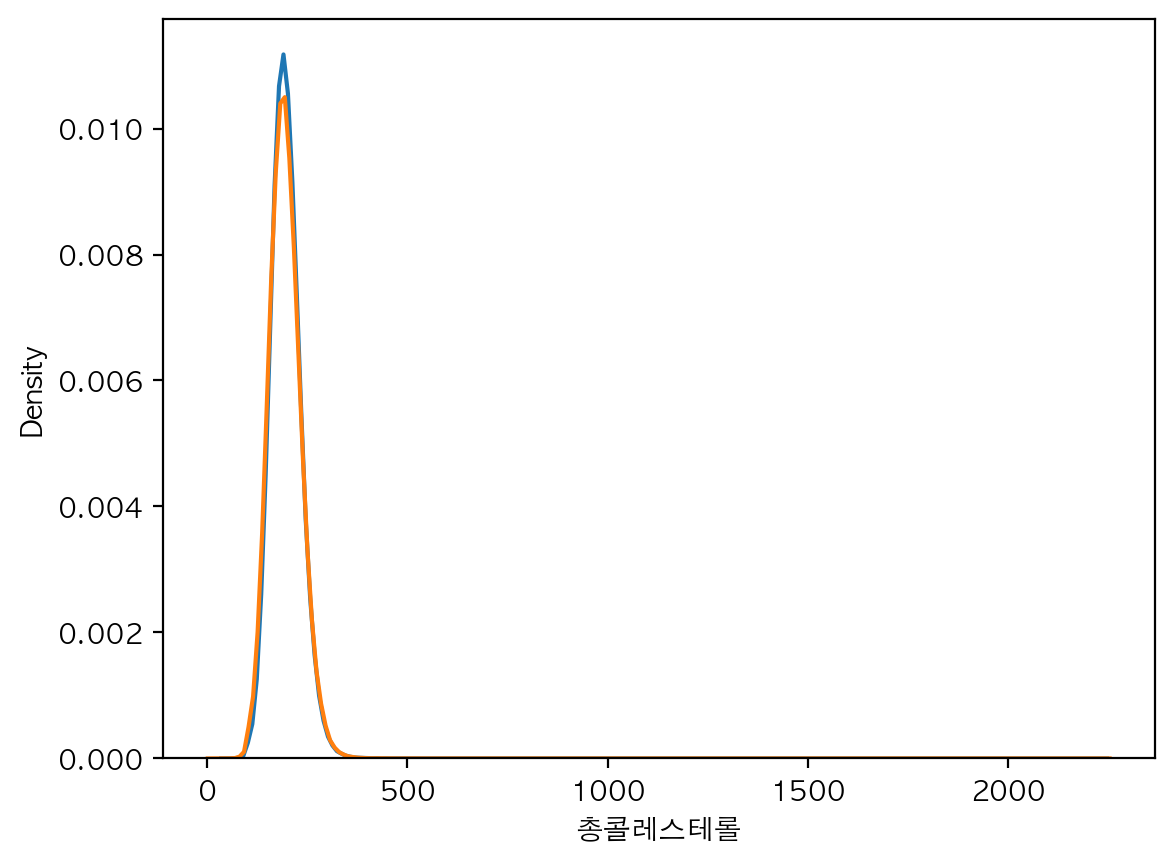

In [52]:
# kdeplot : 구분이 쉽도록 히스토그램을 뺀 부드러운 곡선 그래프만 그리기

sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], hist=False)
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], hist=False)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

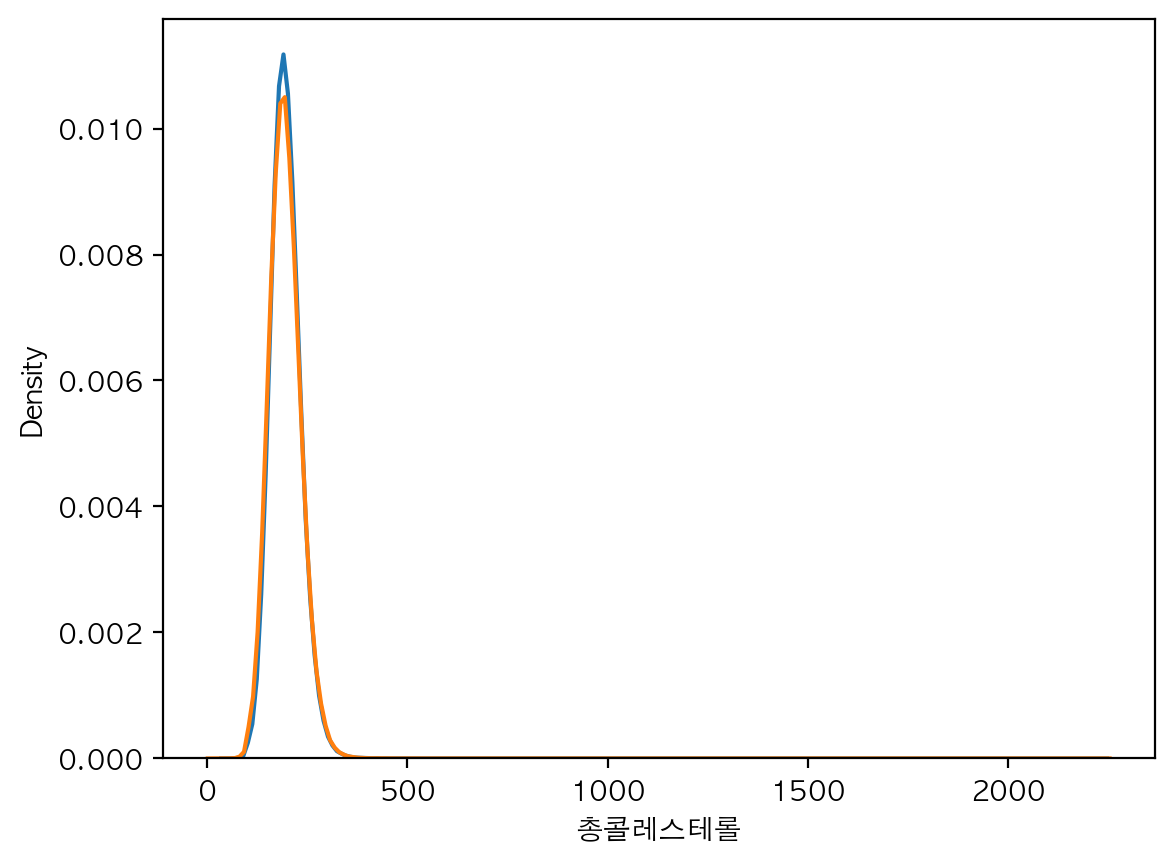

In [46]:
# kdeplot : 구분이 쉽도록 히스토그램을 뺀 부드러운 곡선 그래프만 그리기
# 구분 할 수 있도록 label 추가

sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

- 그래프에 범례가 표시되지 않아 코드를 추가함

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

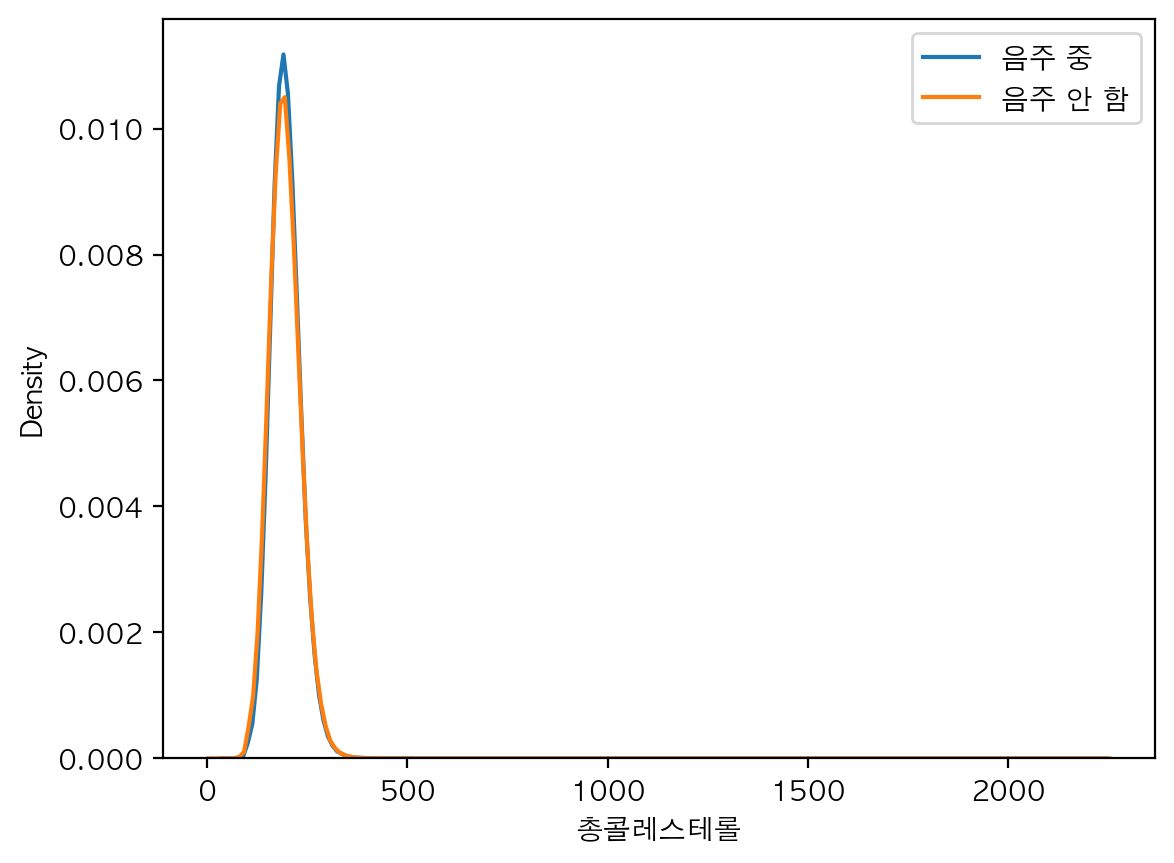

In [77]:
# kdeplot : 구분이 쉽도록 히스토그램을 뺀 부드러운 곡선 그래프만 그리기
# 구분 할 수 있도록 label 추가

sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

# 범례 표시
plt.legend()

#### -> 음주하는 사람들(파란선)의 값이 좀 더 뾰족하게 솟아있다.
- 샘플데이터로도 확인해보기

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

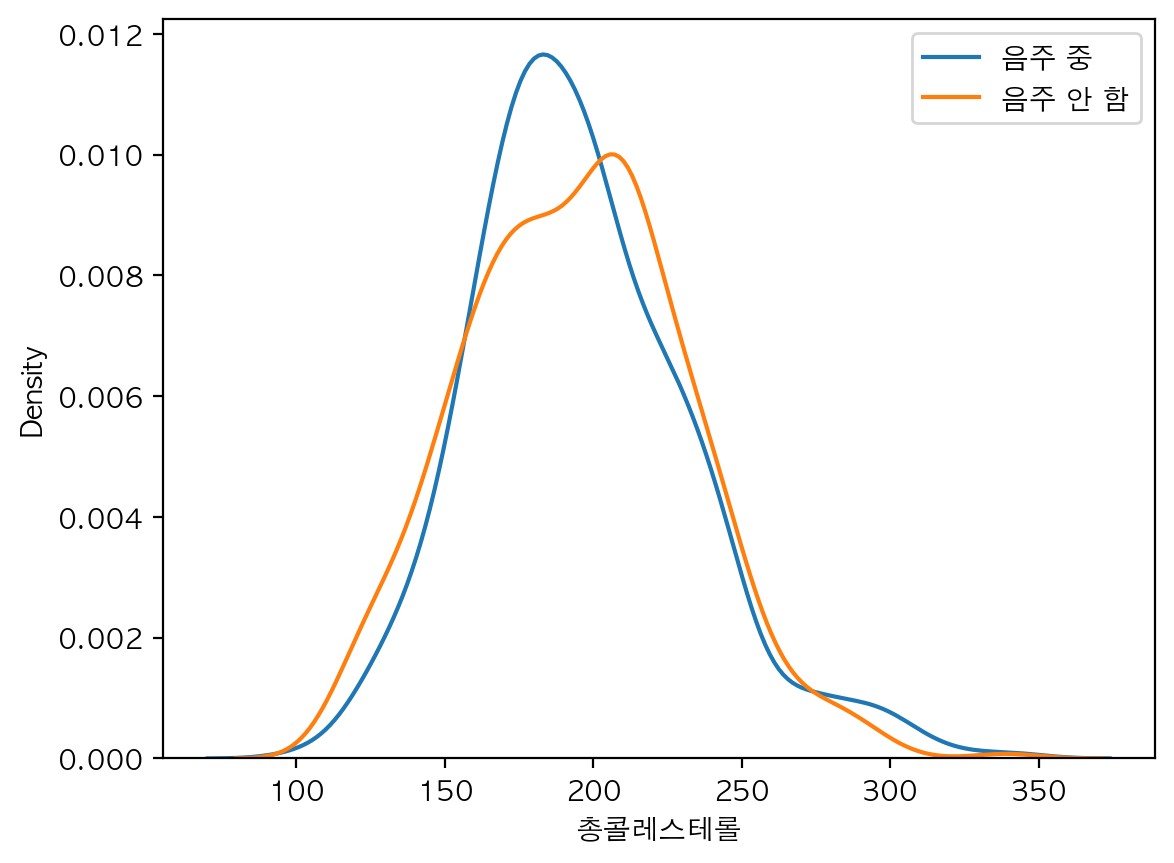

In [79]:
# 샘플데이터로 그리기
# kdeplot : 구분이 쉽도록 히스토그램을 뺀 부드러운 곡선 그래프만 그리기
# 구분 할 수 있도록 label 추가

sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

plt.legend()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

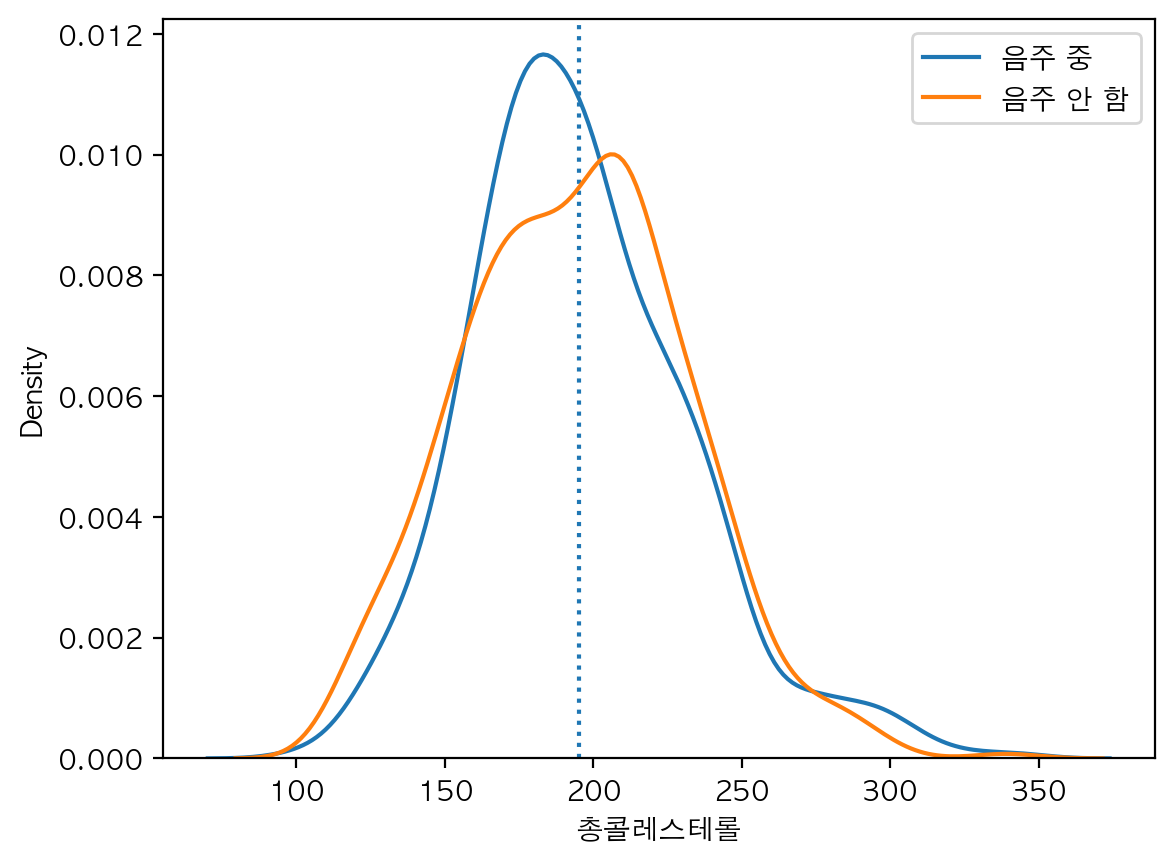

In [81]:
# 평균값 함께 표시하기
# 선 스타일은 점선으로

plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

plt.legend()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

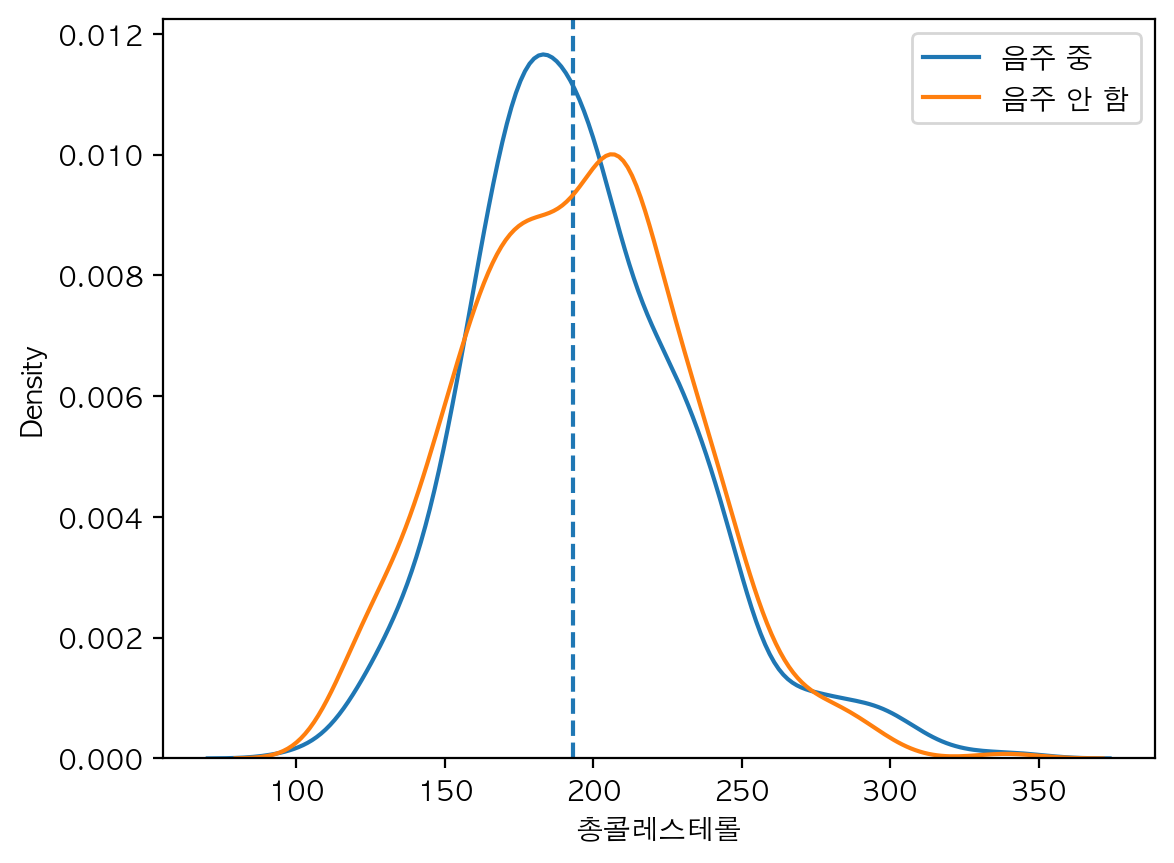

In [83]:
# 중앙값 함께 표시하기

plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

plt.legend()

### 감마지티미 값 시각화하기 - 음주여부에 따라

In [72]:
# 음주여부에 따른 감마지티피 값(시리즈)을 각각 변수에 담기

s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

print(s_1)
print(s_0)

653769     66.0
372778    165.0
759327     29.0
970612     48.0
949015     27.0
          ...  
263637     55.0
830250     59.0
890013     22.0
875389     12.0
808228    122.0
Name: 감마지티피, Length: 511, dtype: float64
276826     35.0
849425     19.0
504499     15.0
601054     13.0
980221    265.0
          ...  
671388     49.0
835467     35.0
62192      46.0
358458     11.0
317698     22.0
Name: 감마지티피, Length: 487, dtype: float64


-> loc를 사용하였으므로 시리즈 형태로 나온다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

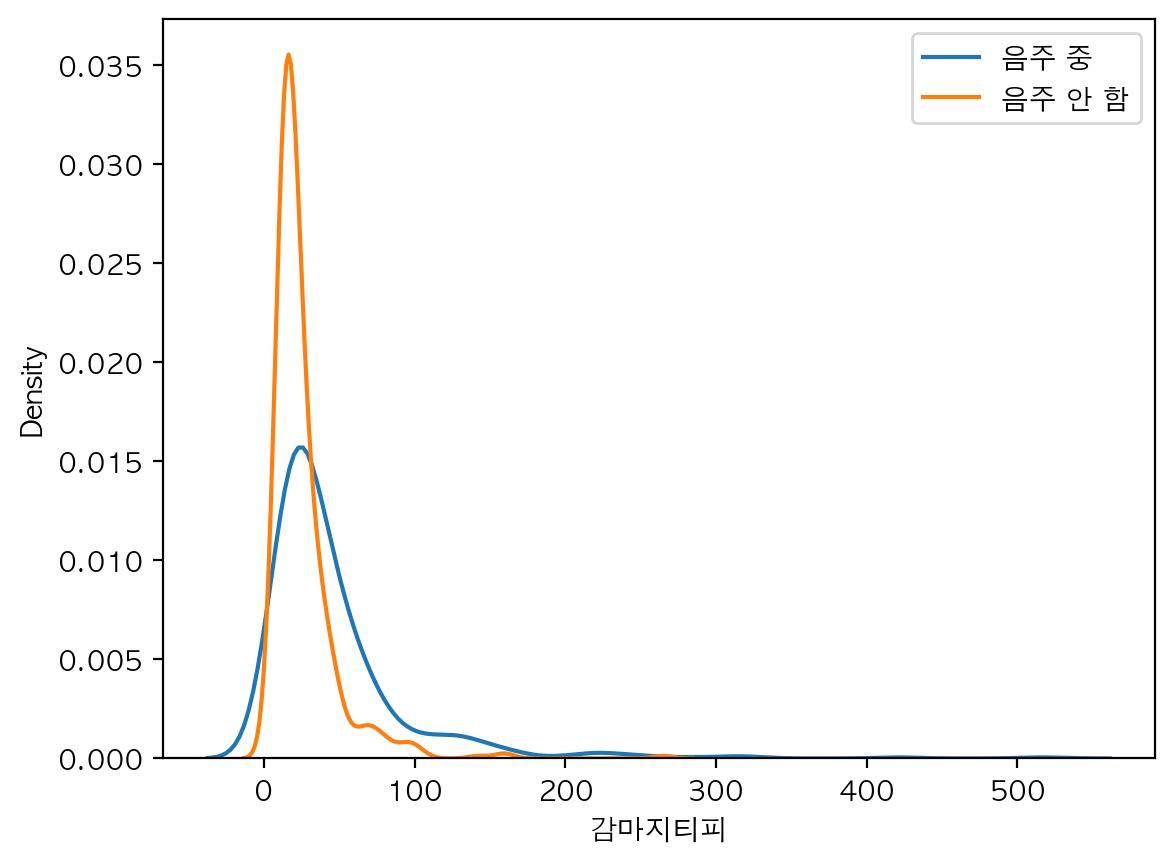

In [85]:
# 감마지티미 값에 따라 음주여부 시각화하기

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

plt.legend()

#### -> 음주 안하는 사람들의 감마지티피 값이 훨씬 높게 나온다.
### 가설 검증 완료 : 음주 여부에 따라 건강검진 수치의 차이가 있음을 알 수 있다.
---

## 12. 상관계수 - heatmap 으로 표현하기
### [가설2] 검증하기 : 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- **상관 관계**란 두 변수간의 관계의 강도를 뜻한다.
    - 상관계수는 변수들 간의 관계를 알아볼 때 유용한 개념이다. 특정 데이터에 대한 상관관계를 볼 수 있다. 
- **상관 계수**로 상관관계의 정도를 파악한다.
    - 상관계수는 -1부터 1사이로 구성되고, 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있습니다.
    - 상관계수에는 pearson, kendall, spearman 등이 있다. -> corr() 파라미터의 method에서 확인 가능
    - 상관계수는 두 변수간의 연관된 정도를 나타낼 뿐, 인과관계를 설명하지 않는다.
    - 인과관계가 있는지는 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해볼 수 있다.

In [12]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [14]:
# 상관계수에 사용할 컬럼들을 변수 columns에 담기
columns = [
    '연령대코드(5세단위)', '신장(5Cm단위)',  '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부'
]

columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

### 상관계수 구하기

In [16]:
# 샘플데이터의 컬럼만 가져와서 df_small이라는 데이터프레임에 담은 뒤 상관계수 구하기

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.397412   -0.210610  0.134720 -0.201947 -0.203802   
신장(5Cm단위)      -0.397412   1.000000    0.648489  0.293774  0.141800  0.156605   
체중(5Kg 단위)     -0.210610   0.648489    1.000000  0.790520  0.076534  0.133502   
허리둘레            0.134720   0.293774    0.790520  1.000000 -0.033007  0.034518   
시력(좌)          -0.201947   0.141800    0.076534 -0.033007  1.000000  0.462877   
시력(우)          -0.203802   0.156605    0.133502  0.034518  0.462877  1.000000   
청력(좌)           0.193769  -0.100178   -0.038100  0.048379 -0.049368 -0.041439   
청력(우)           0.253585  -0.121083   -0.070590  0.052245 -0.084603 -0.096255   
수축기혈압           0.296807   0.030012    0.244673  0.333025 -0.010112 -0.020638   
이완기혈압           0.149758   0.118103    0.287084  0.302398 -0.001695  0.012802   
식전혈당(공복혈당)      0.166079   0.059881    0.155556  0.219585 -0.075272  0.006790   
총콜레스테롤          0.005873  -0.013813    0.082305  0.081332  0.005267  0.038706   
트리글리세라이드        0.033434   0.113687    0.238945  0.288572  0.029648  0.018477   
HDL콜레스테롤       -0.121635  -0.152505   -0.357603 -0.409940  0.021295 -0.030666   
LDL콜레스테롤        0.023206  -0.003485    0.106049  0.098301 -0.015221  0.044949   
혈색소            -0.165788   0.529475    0.508366  0.377023  0.073866  0.056753   
요단백            -0.022885   0.014089    0.028840 -0.002252  0.010995  0.009548   
혈청크레아티닌         0.020587   0.243101    0.190769  0.149351  0.018104  0.031835   
(혈청지오티)AST      0.106376   0.035321    0.196722  0.229202  0.003379  0.024706   
(혈청지오티)ALT     -0.014101   0.187945    0.372930  0.357288  0.029429  0.083163   
감마지티피           0.052946   0.171372    0.254150  0.271566  0.011519  0.045560   
흡연상태           -0.136350   0.505945    0.397230  0.268685  0.063964  0.054681   
음주여부           -0.277149   0.362905    0.235974  0.084514  0.073696  0.063220   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.193769  0.253585  0.296807  0.149758  ... -0.121635  0.023206   
신장(5Cm단위)   -0.100178 -0.121083  0.030012  0.118103  ... -0.152505 -0.003485   
체중(5Kg 단위)  -0.038100 -0.070590  0.244673  0.287084  ... -0.357603  0.106049   
허리둘레         0.048379  0.052245  0.333025  0.302398  ... -0.409940  0.098301   
시력(좌)       -0.049368 -0.084603 -0.010112 -0.001695  ...  0.021295 -0.015221   
시력(우)       -0.041439 -0.096255 -0.020638  0.012802  ... -0.030666  0.044949   
청력(좌)        1.000000  0.512849  0.105602  0.034535  ... -0.015340 -0.018551   
청력(우)        0.512849  1.000000  0.127883  0.041907  ... -0.078820 -0.059298   
수축기혈압        0.105602  0.127883  1.000000  0.744132  ... -0.138843  0.003982   
이완기혈압        0.034535  0.041907  0.744132  1.000000  ... -0.090783  0.045014   
식전혈당(공복혈당)  -0.000567  0.035457  0.168399  0.134820  ... -0.136568 -0.038186   
총콜레스테롤      -0.034960 -0.095937  0.047920  0.097394  ...  0.137891  0.880425   
트리글리세라이드    -0.029229 -0.027957  0.187875  0.166679  ... -0.383788  0.011516   
HDL콜레스테롤    -0.015340 -0.078820 -0.138843 -0.090783  ...  1.000000 -0.062431   
LDL콜레스테롤    -0.018551 -0.059298  0.003982  0.045014  ... -0.062431  1.000000   
혈색소         -0.015990 -0.031084  0.143038  0.219912  ... -0.208488  0.112034   
요단백         -0.026771 -0.013656  0.016896  0.021567  ... -0.005009 -0.004715   
혈청크레아티닌     -0.026352 -0.030057  0.090268  0.131162  ... -0.142140  0.037578   
(혈청지오티)AST   0.014587  0.002233  0.143089  0.159043  ... -0.031833  0.011017   
(혈청지오티)ALT   0.003031 -0.023672  0.118240  0.154490  ... -0.179211  0.075795   
감마지티피       -0.006351  0.005842  0.176208  0.204673  ... -0.121648  0.046815   
흡연상태        -0.034204 -0.040937  0.108511  0.144251  ... -0.188906 -0.011593   
음주여부        -0.037669 -0.032475  0.032543  0.110143  ...  0.052452 -0.046947   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.165788 -0.022885  0.020587    0.106376   -0.014101  0

- 상관계수 디폴트는 pearson로 설정되어 있다.
- 자기자신의 상관계수는 1이다. (매우 강한 상관관계)

[위키백과 상관분석 링크](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)  
일반적으로  
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계  
로 해석한다.

In [143]:
# 키에 대한 상관계수 보기

df_corr["신장(5Cm단위)"]

연령대코드(5세단위)   -0.397412
신장(5Cm단위)      1.000000
체중(5Kg 단위)     0.648489
허리둘레           0.293774
시력(좌)          0.141800
시력(우)          0.156605
청력(좌)         -0.100178
청력(우)         -0.121083
수축기혈압          0.030012
이완기혈압          0.118103
식전혈당(공복혈당)     0.059881
총콜레스테롤        -0.013813
트리글리세라이드       0.113687
HDL콜레스테롤      -0.152505
LDL콜레스테롤      -0.003485
혈색소            0.529475
요단백            0.014089
혈청크레아티닌        0.243101
(혈청지오티)AST     0.035321
(혈청지오티)ALT     0.187945
감마지티피          0.171372
흡연상태           0.505945
음주여부           0.362905
Name: 신장(5Cm단위), dtype: float64

- .sort_values()를 사용하면 상관계수가 낮은 것부터 높은 순서대로 정렬해준다. 이를 활용해 의미있는 값을 찾아볼 수 있다.

In [145]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터 보기

df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [149]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터 보기

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
허리둘레          0.293774
시력(좌)         0.141800
시력(우)         0.156605
이완기혈압         0.118103
트리글리세라이드      0.113687
혈색소           0.529475
혈청크레아티닌       0.243101
(혈청지오티)ALT    0.187945
감마지티피         0.171372
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

-> 허리둘레는 0.29 정도의 상관관계를 갖는다.

In [154]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터 보기

df_corr["음주여부"].sort_values()

연령대코드(5세단위)   -0.277149
LDL콜레스테롤      -0.046947
청력(좌)         -0.037669
청력(우)         -0.032475
요단백           -0.012932
총콜레스테롤         0.019892
수축기혈압          0.032543
HDL콜레스테롤       0.052452
시력(우)          0.063220
혈청크레아티닌        0.072320
시력(좌)          0.073696
허리둘레           0.084514
식전혈당(공복혈당)     0.086991
(혈청지오티)AST     0.088594
(혈청지오티)ALT     0.095971
트리글리세라이드       0.103018
이완기혈압          0.110143
체중(5Kg 단위)     0.235974
감마지티피          0.250011
혈색소            0.291863
신장(5Cm단위)      0.362905
흡연상태           0.365642
음주여부           1.000000
Name: 음주여부, dtype: float64

In [158]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터 보기
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [160]:
df_corr["혈색소"].sort_values()

HDL콜레스테롤      -0.208488
연령대코드(5세단위)   -0.165788
청력(우)         -0.031084
청력(좌)         -0.015990
요단백            0.019795
시력(우)          0.056753
시력(좌)          0.073866
LDL콜레스테롤       0.112034
총콜레스테롤         0.122240
식전혈당(공복혈당)     0.131582
수축기혈압          0.143038
(혈청지오티)AST     0.171762
트리글리세라이드       0.200421
혈청크레아티닌        0.214091
이완기혈압          0.219912
감마지티피          0.236197
음주여부           0.291863
(혈청지오티)ALT     0.294575
허리둘레           0.377023
흡연상태           0.460010
체중(5Kg 단위)     0.508366
신장(5Cm단위)      0.529475
혈색소            1.000000
Name: 혈색소, dtype: float64

In [162]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터 보기

df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
Name: 혈색소, dtype: float64

In [164]:
# 감마지티피에 대한 상관계수가 특정 수치 이상이 데이터 보기
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

### heatmap
- 위에서 구한 상관계수를 heatmap으로 도식화하여 보기

<Axes: >

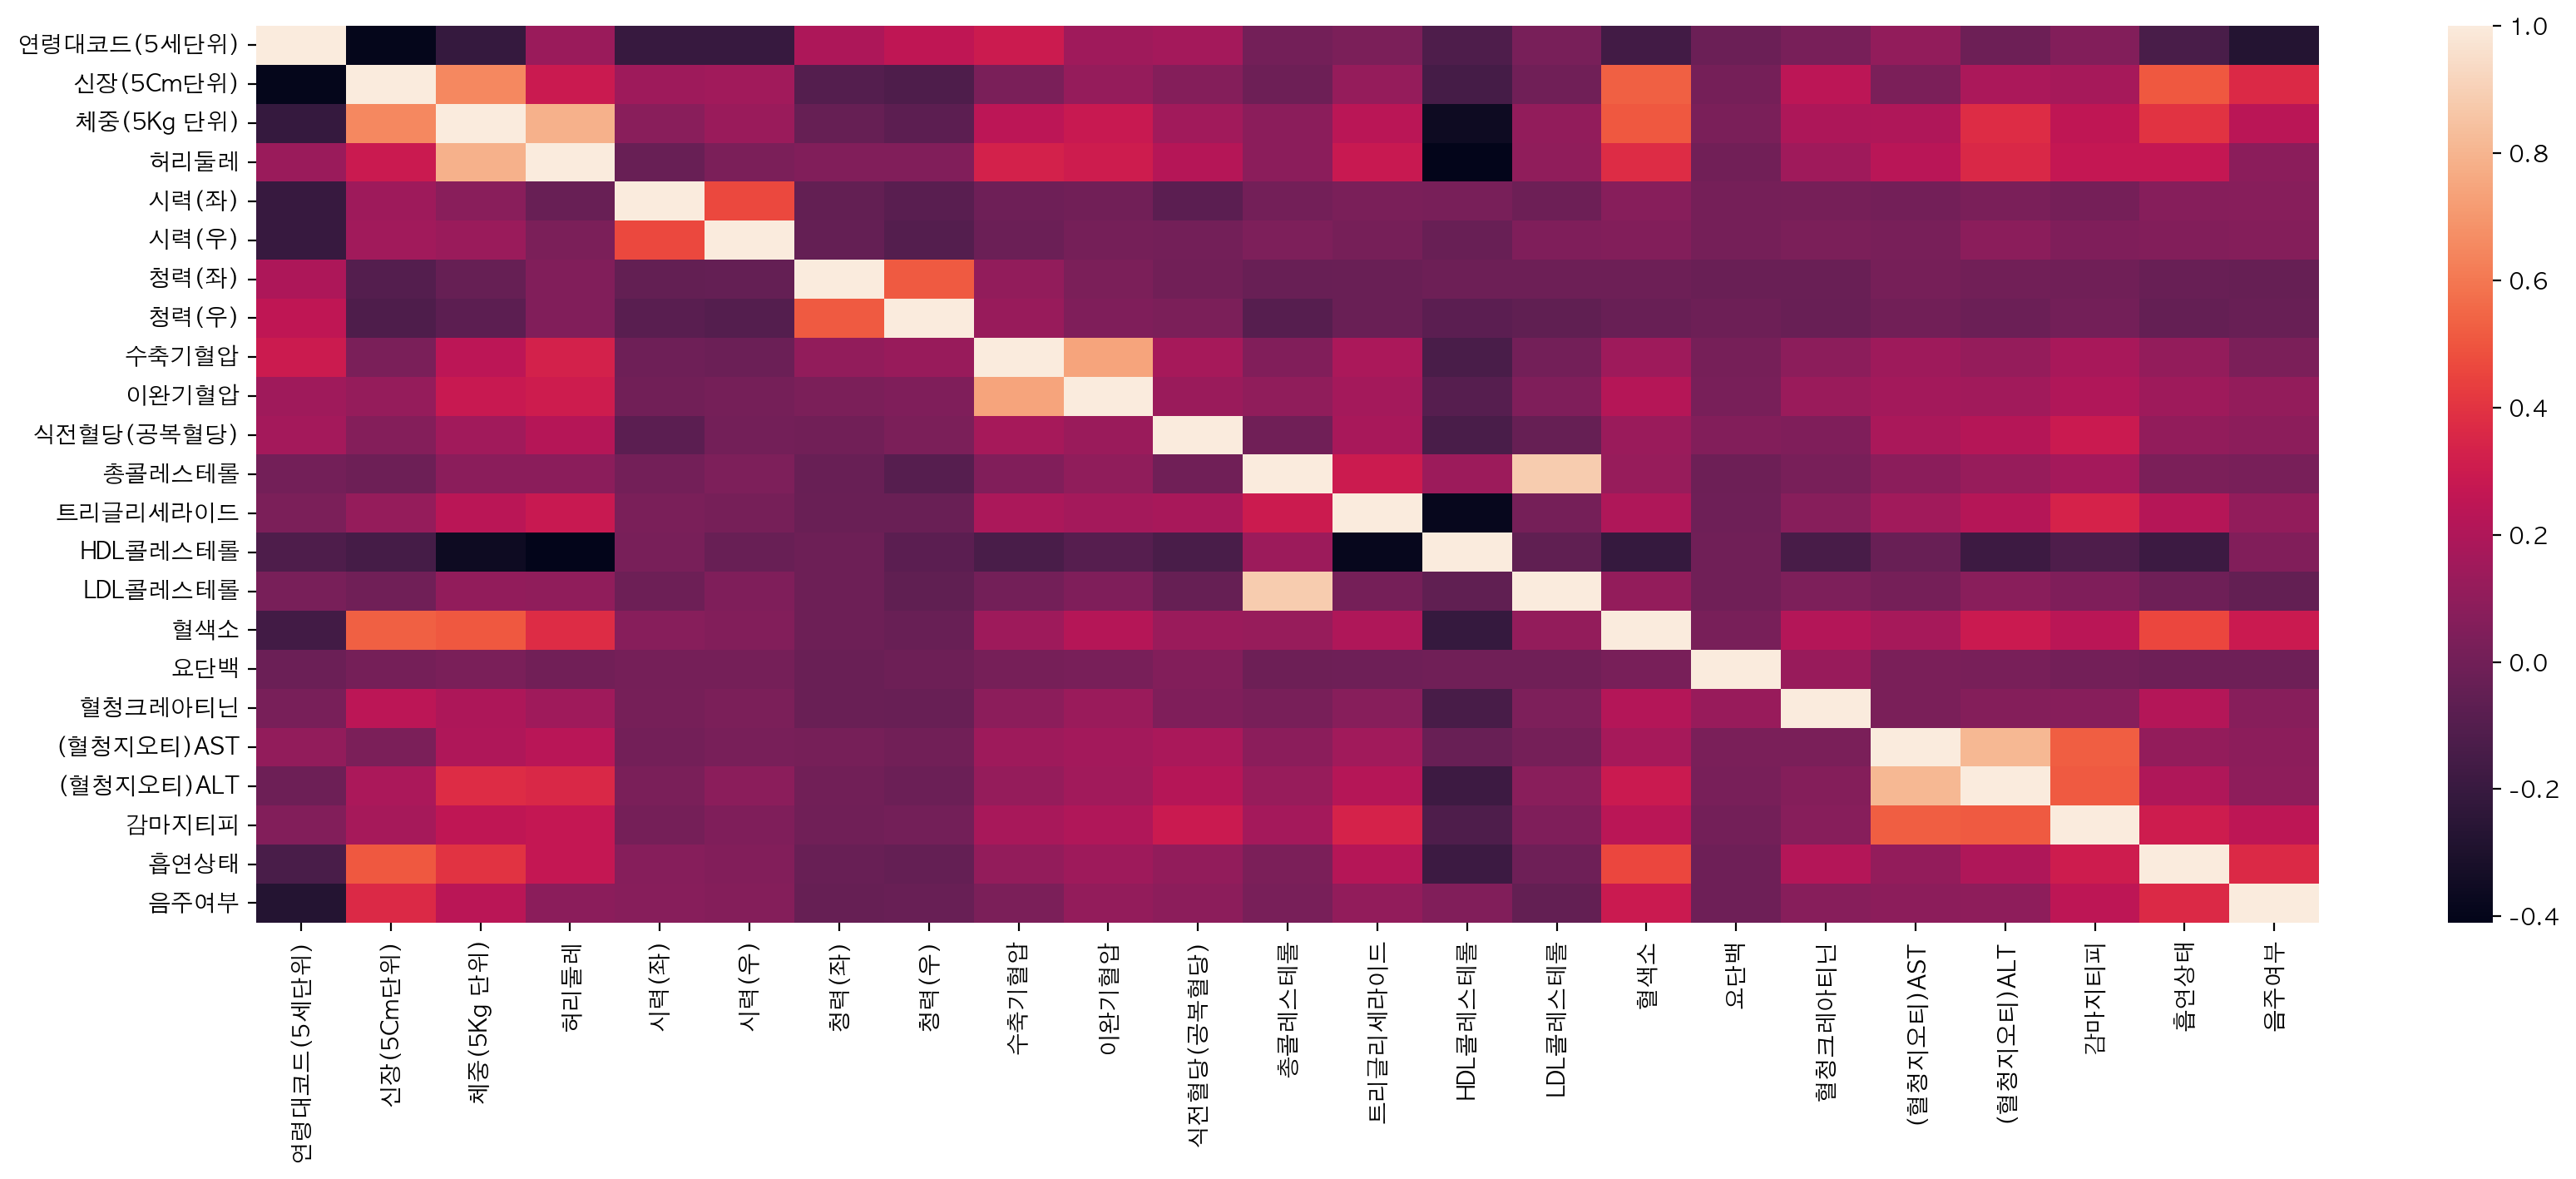

In [171]:
# 위에서 구한 상관계수를 heatmap으로 표현

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr)

#### heatmap의 옵션
- annot : heatmap내에 숫자 표현
- fmt : heatmap내에 숫자의 소수점 자리수 설정 (예를 들어 .2f는 소수점 2번째 자리까지 표현하는 것)
- cmap : heatmap의 색상 설정

<Axes: >

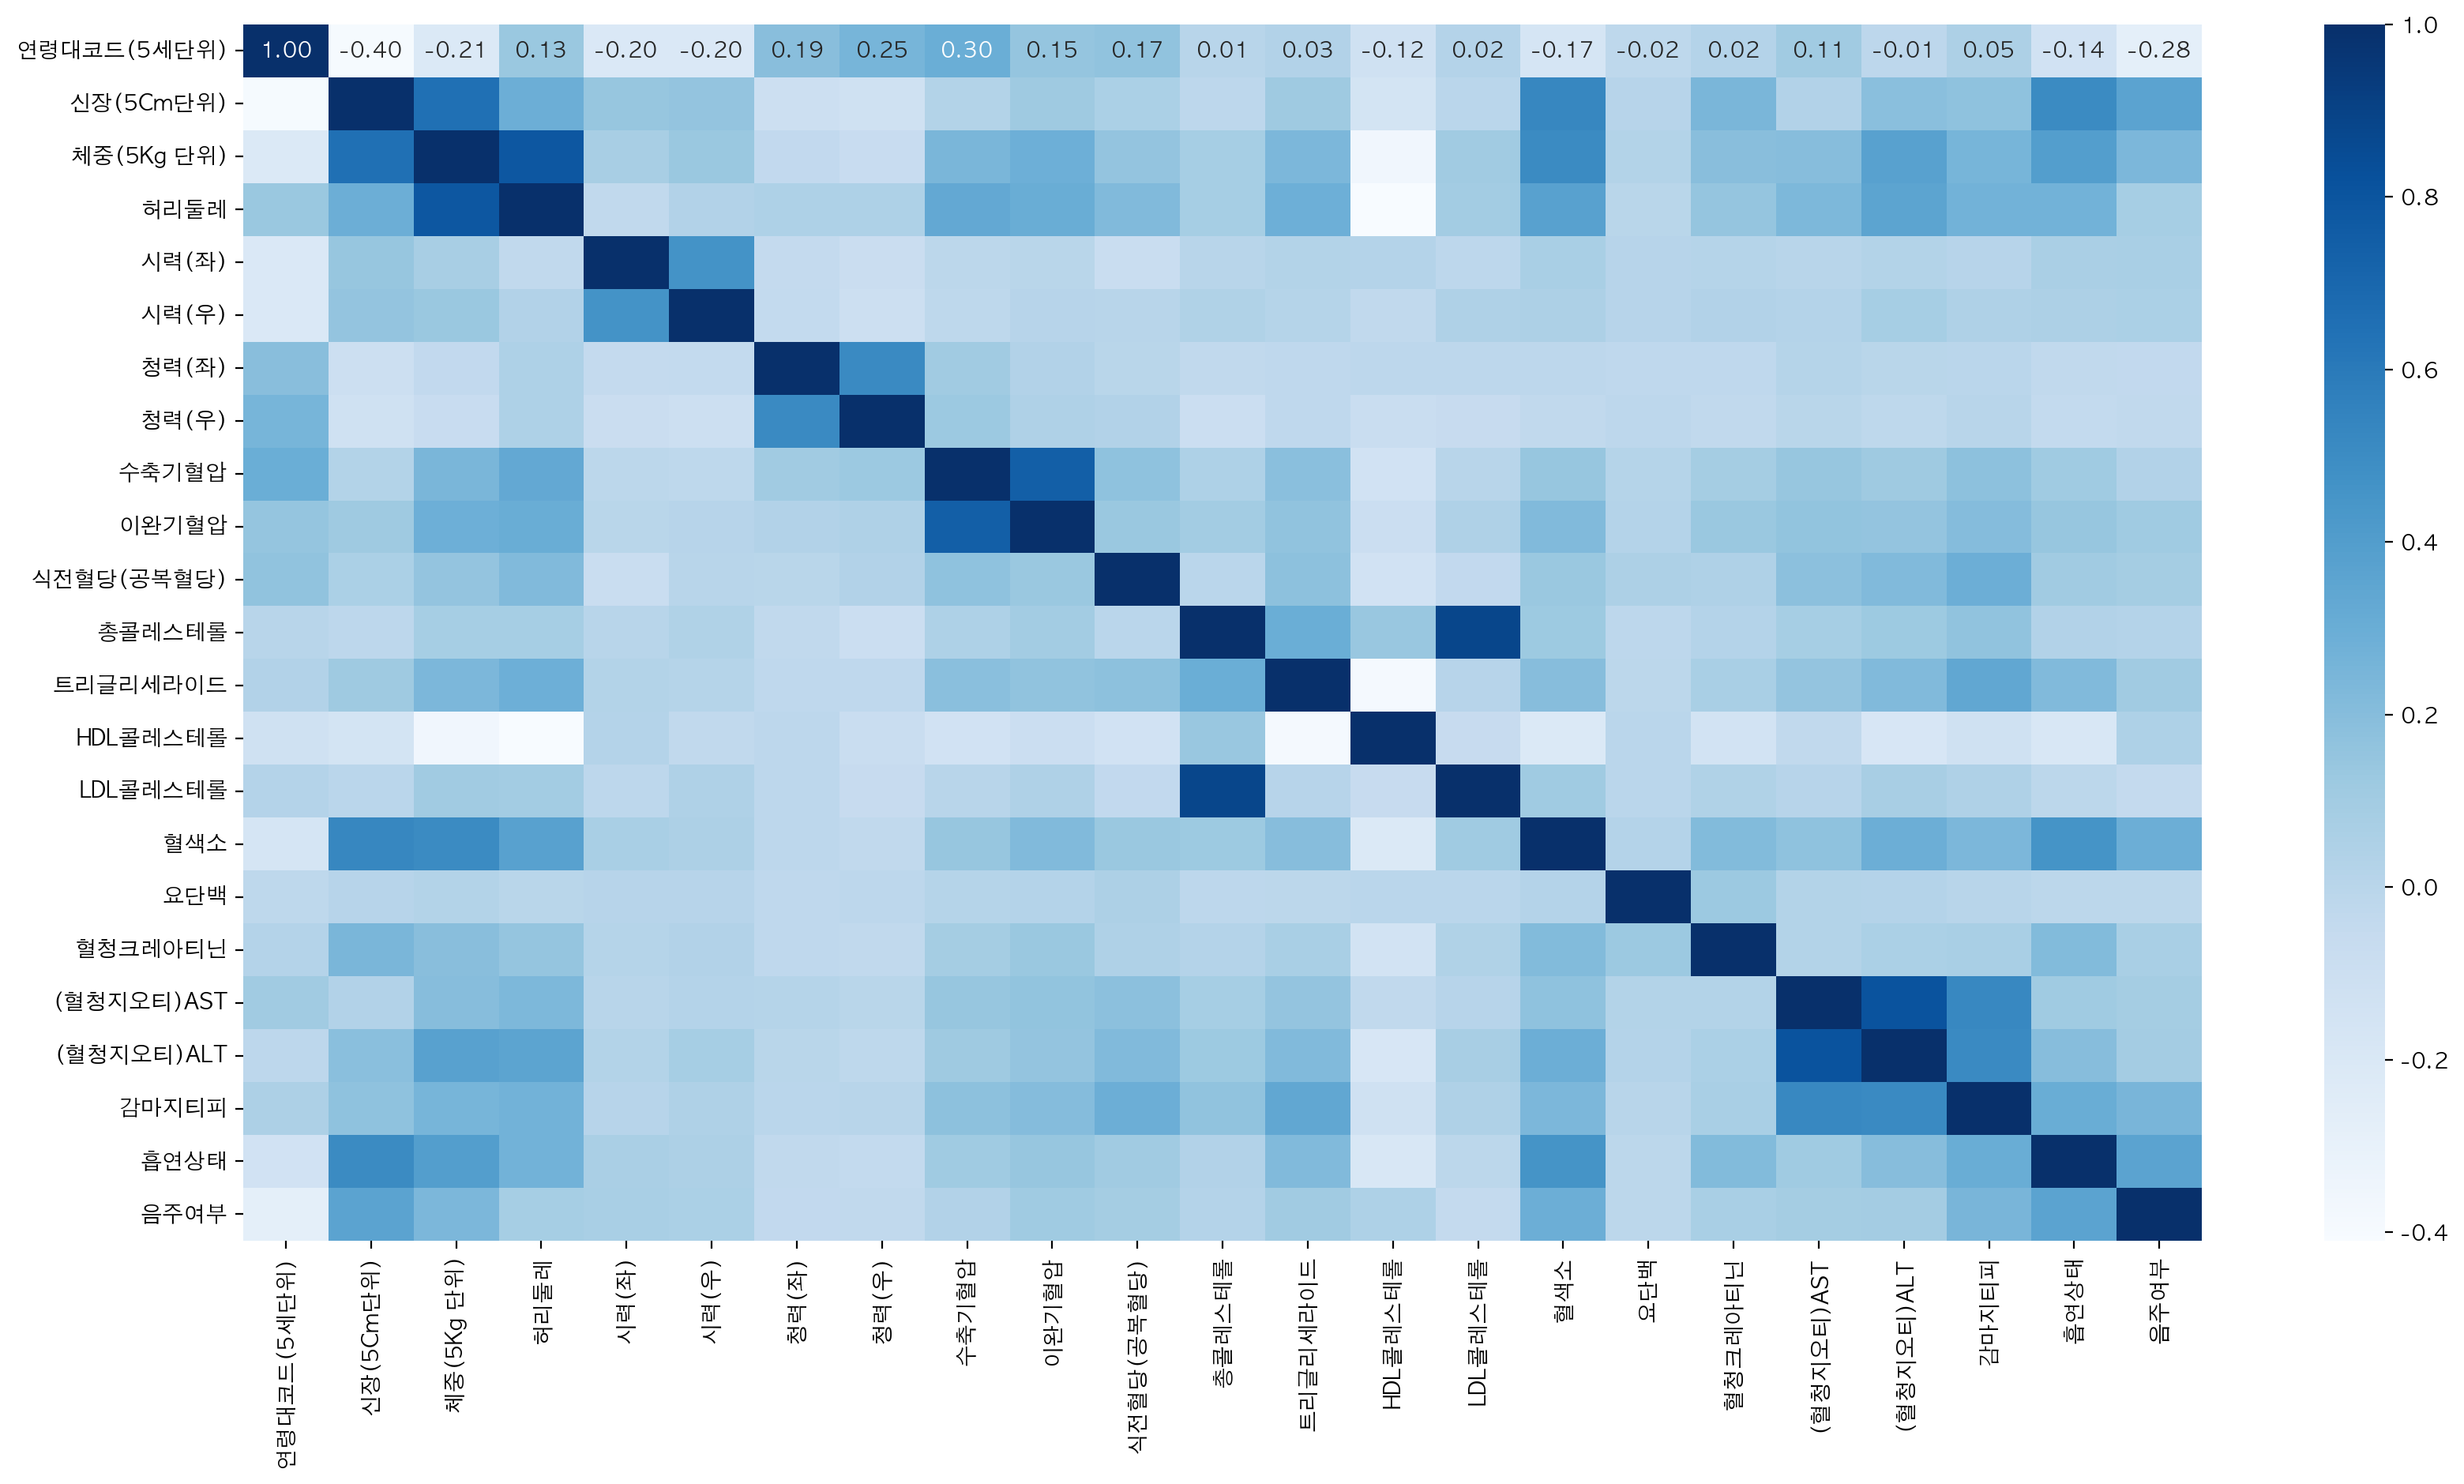

In [190]:
# 위에서 구한 상관계수를 heatmap으로 표현 - 옵션 사용하기

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

annot이 첫 줄만 나타난다. 검색해보니 버전이 0.12.2일 때 많이 발생하는 문제로 업그레이드가 필요하다고 한다.  
버전을 확인해본다.

In [194]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /opt/homebrew/anaconda3/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno, ultralytics


In [197]:
# seaborn 버전 업그레이드 하기
!pip install seaborn --upgrade

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


**-> 0.13.2로 업그레이드 되었다. 다시 시도해본다.**

<Axes: >

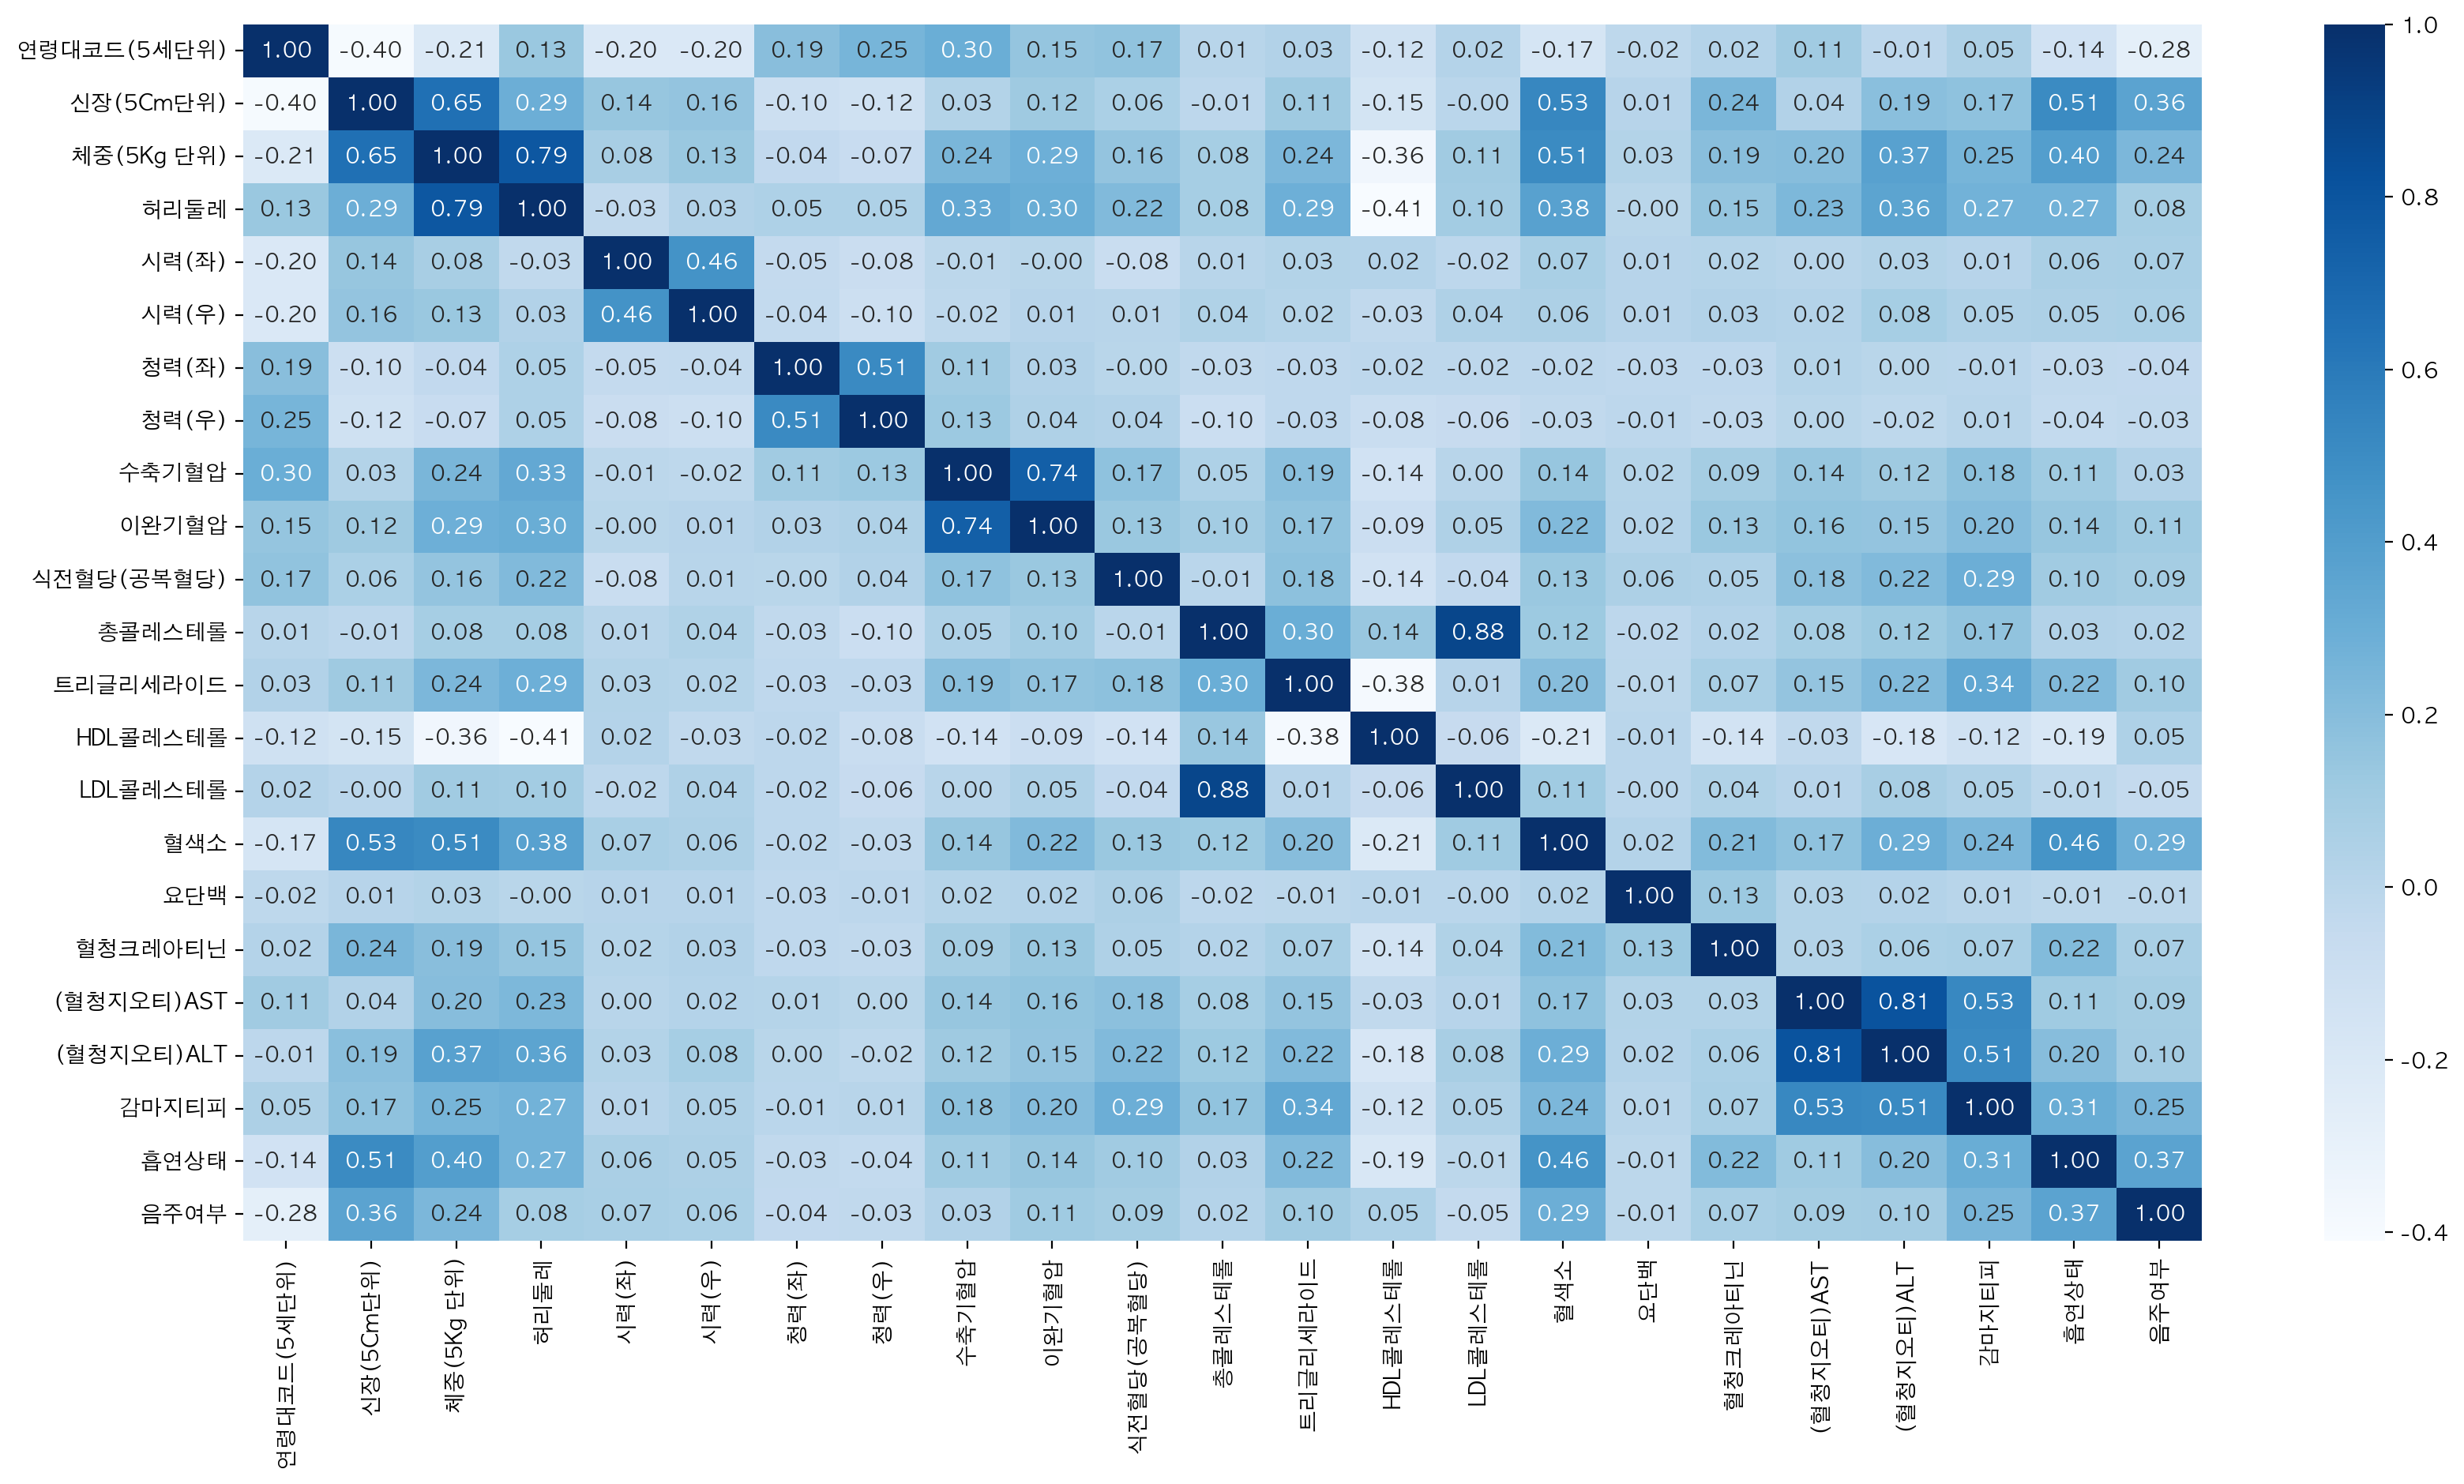

In [20]:
# 위에서 구한 상관계수를 heatmap으로 표현 - 옵션 사용하기

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

-> 허리둘레와 체중은 0.79로 강한 상관관계를 가지고 있다.  

[heatmap 공식문서로 옵션 확인하기](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)  

- mask 설정 활용해보기
    - mask는 매트릭스의 대각선 아래만 표시하는 기능

In [29]:
# 공식문서에서 mask 옵션 확인하여 사용하기
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

<Axes: >

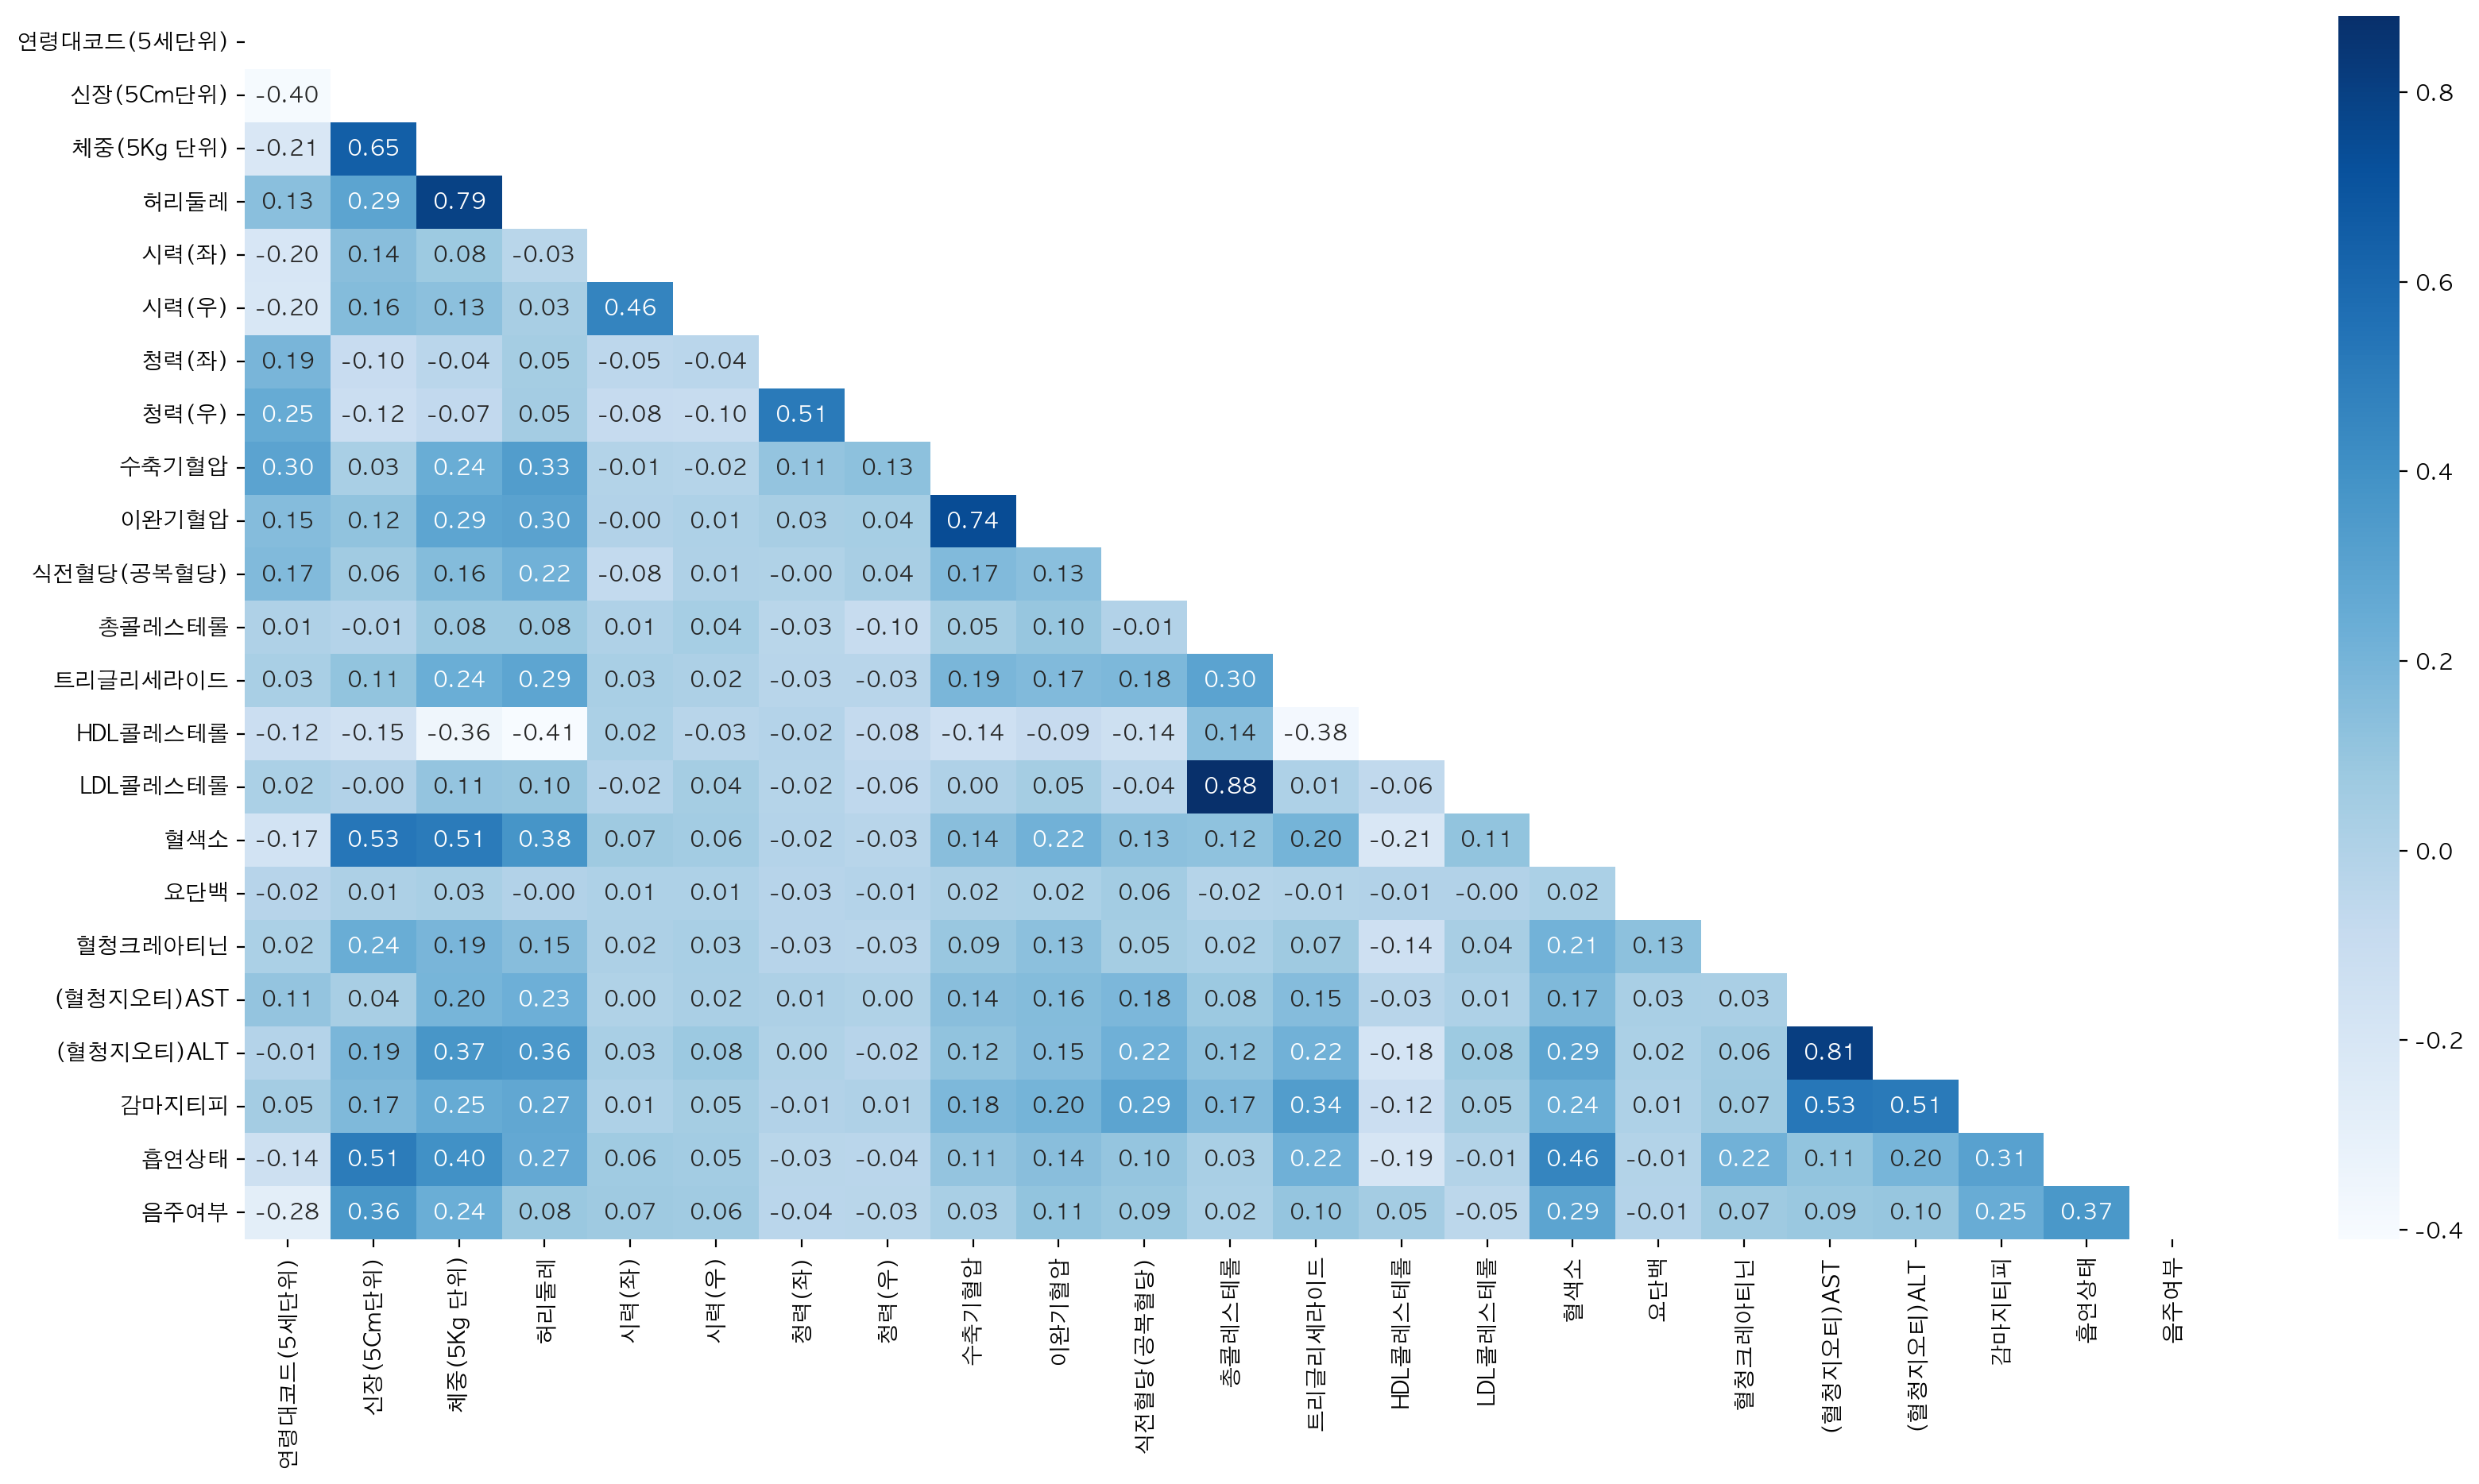

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

- vmax, vmin옵션은 색상 농도를 지정하는 옵션이다.

### 가설 검증 완료
- [가설1] 음주 여부에 따라 건강검진 수치 차이가 있을까?
    - 음주여부는 신장(0.36)과 흡연상태(0.37)와 약간의 상관관계가 있다.
- [가설2] 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
    - 신장과 허리둘레는 각각 0.65, 0.79로 높은 상관관계가 있다.

---
- 참고사항 : 4~8기가의 메모리가 있으면 pandas로 백만건의 데이터 분석이 가능하다. 